# Projeto - Análise do dataset "Wine Quality"

**Degree**: Data Science | **Turma**: 815 | **Instituição**: Let's Code | **Módulo**: VIII - Estatística II

Professor: [Sandro Saorin](https://github.com/saorinsandro)

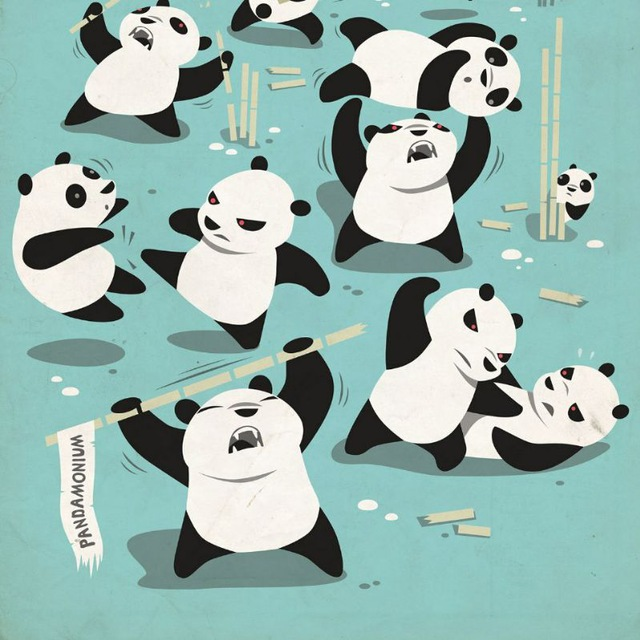

### Grupo Pandamonium 3: The Sommelier Experience

**Colegas participantes do grupo para o projeto**:


* [Ana Gabriela de Castro Almeida](https://github.com/almeidacastrogabriela)

* [Jeremias Diefenthaler](https://github.com/JeremiasDief)

### Instruções

- O projeto deverá ser entregue até dia 05/05;
- O projeto poderá ser feito __individualmente__ ou em __grupos__ de até __4 pessoas__;

### Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

Para ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto devem ser desenvolvidas análises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informações sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, o projeto será dividido em dois modelos, um de Regressão Linear e outro de Regressão Logística. No __primeiro modelo__, o objetivo será modelar um regressor que estime o valor da qualidade do vinho (para este primeiro modelo, desconsidere a variável `quality`). No __segundo modelo__, utilizando como variável resposta (_target_) a variável `quality`, modelar um classificador que separe entre vinhos bons e ruins (para isto, considere `quality` >= 6 como um vinho bom). Além disso, avaliar a necessidade ou não de aplicar regularizações no modelo.

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

<br>

__Importante:__ Façam as análises em ambas as bases `winequality-red.csv` e `winequality-white.csv` separadamente, e depois misturem os dados para uma nova análise (no total serão 3 análises a serem feitas).

<br>

A entrega deve ser feita em um arquivo _Jupyter Notebook_ em aba que será disponibilizada no Class, contendo todo o desenvolvimento do projeto e o nome(s) do(s) aluno(s).

---------------------------
----------------------------
---------------------------

In [1]:
# Importando as bibliotecas que poderão ser utlizadas ao longo do projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# desabilita os warnings
import warnings
warnings.filterwarnings("ignore")

## Dicionário de variáveis (para ambos os datasets)

|Variável|Tradução|Descrição|
|:----------------|:--------------|:----------------------------------------------------------------------|
|fixed acidity|Acidez fixa| É a diferença entre a acidez total e a acidez volátil.
|volatile acidity|Acidez volátil| Ácido acético que é formado na fermentação alcoólica e, em dose elevada, origina o aroma a vinagre.
|citric acid|Ácido cítrico| É um ácido orgânico forte, normalmente presente em fracas quantidades nos mostos de uva e geralmente ausente nos vinhos.
|residual sugar|Açúcar residual| Açúcar que sobra após terminar a fermentação alcoólica.
|chlorides|Cloretos| Indica a presença de sal no vinho.
|free sulfur dioxide|Dióxido de enxofre livre| É uma medida da quantidade de dióxido de enxofre que não está ligado a outras moléculas.
|total sulfur dioxide|Dióxido de enxofre total| É uma médida de ambos os dióxidos de enxofre, livre e ligado a outras moléculas.
|density|Densidade| A densidade do vinho.
|pH|pH| O pH do vinho.
|sulphates|Sulfatos| Indica a presença de sais de ácido sulfúrico.
|alcohol|Álcool| Teor alcoólico do vinho.
|quality|Qualidade| Indica a qualidade do vinho de 0 a 10, sendo 0 a pior nota e 10 a melhor.

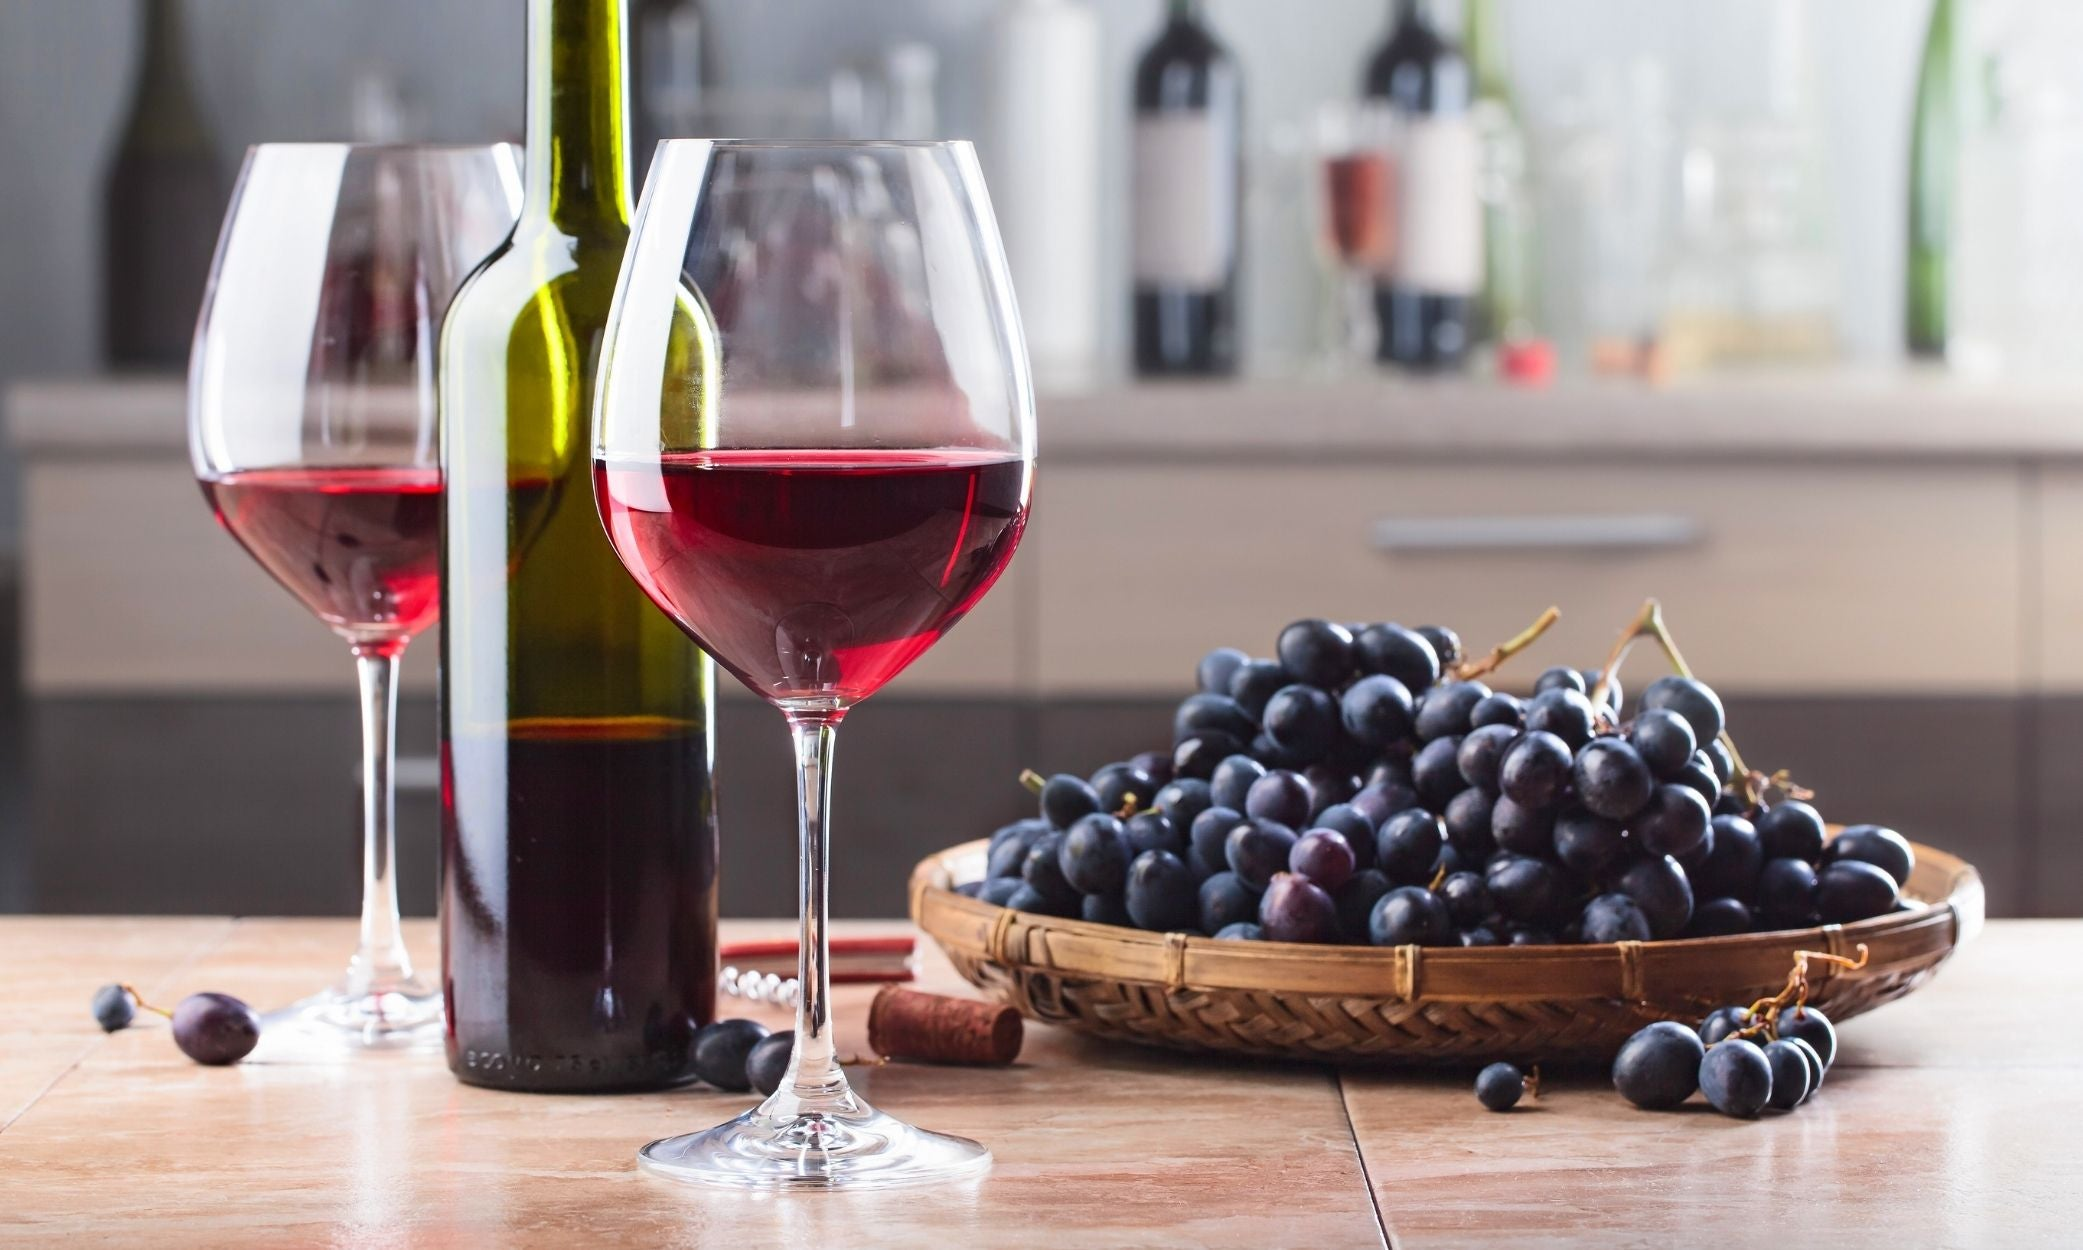

# Explorando os dados sobre *__VINHOS TINTOS__*

In [2]:
# Criando o dataframe para o arquivo sobre a qualidade de vinhos tintos
tinto = pd.read_csv("./datasets/winequality-red.csv", sep=";")
tinto.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# Traduzindo os nomes das colunas no dataset de *__VINHOS TINTOS__*

In [3]:
tinto.columns = ["Acidez fixa", "Acidez volátil", "Ácido cítrico", "Açúcar residual", "Cloretos", 
                 "Dióxido de enxofre livre", "Dióxido de enxofre total", "Densidade", "pH", "Sulfatos", 
                 "Álcool", "Qualidade"]
tinto.head()

Acidez fixa  Acidez volátil  Ácido cítrico  Açúcar residual  Cloretos  \
0          7.4            0.70           0.00              1.9     0.076   
1          7.8            0.88           0.00              2.6     0.098   
2          7.8            0.76           0.04              2.3     0.092   
3         11.2            0.28           0.56              1.9     0.075   
4          7.4            0.70           0.00              1.9     0.076   

   Dióxido de enxofre livre  Dióxido de enxofre total  Densidade    pH  \
0                      11.0                      34.0     0.9978  3.51   
1                      25.0                      67.0     0.9968  3.20   
2                      15.0                      54.0     0.9970  3.26   
3                      17.0                      60.0     0.9980  3.16   
4                      11.0                      34.0     0.9978  3.51   

   Sulfatos  Álcool  Qualidade  
0      0.56     9.4          5  
1      0.68     9.8          5  
2      0.65     9.8          5  
3      0.58     9.8          6  
4      0.56     9.4          5

### Analisando o dataset de VINHOS TINTOS (red)

In [4]:
# Informações sobre as colunas, número de linhas por colunas e os tipos de dados de cada coluna
tinto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Acidez fixa               1599 non-null   float64
 1   Acidez volátil            1599 non-null   float64
 2   Ácido cítrico             1599 non-null   float64
 3   Açúcar residual           1599 non-null   float64
 4   Cloretos                  1599 non-null   float64
 5   Dióxido de enxofre livre  1599 non-null   float64
 6   Dióxido de enxofre total  1599 non-null   float64
 7   Densidade                 1599 non-null   float64
 8   pH                        1599 non-null   float64
 9   Sulfatos                  1599 non-null   float64
 10  Álcool                    1599 non-null   float64
 11  Qualidade                 1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


 - Verificando as informações sobre o dataframe `tinto`, podemos ver que ele possui 1599 linhas, 12 colunas, não tem nenhum dado faltante e cada coluna está em um formato numérico (float ou int). 
 Dessa forma, poderemos utilizar todas as colunas sem necessidade de tratá-las.

In [5]:
# Verificando a presença de dados faltantes (nulos) por coluna
print(f"Qtd de dados faltantes por coluna:\n{tinto.isna().sum()}\n")

# Verificando o número de linhas duplicadas
print("\nQtd de linhas duplicadas: ", tinto.duplicated().sum())

Qtd de dados faltantes por coluna:
Acidez fixa                 0
Acidez volátil              0
Ácido cítrico               0
Açúcar residual             0
Cloretos                    0
Dióxido de enxofre livre    0
Dióxido de enxofre total    0
Densidade                   0
pH                          0
Sulfatos                    0
Álcool                      0
Qualidade                   0
dtype: int64


Qtd de linhas duplicadas:  240


 - Como pode ser visto acima, existem 240 linhas duplicadas no dataset de Vinhos Tintos (tinto). 
 Por esse motivo, para não comprometermos o estudo, essas linhas serão removidas.

In [6]:
# Removendo as 240 linhas duplicadas
tinto.drop_duplicates(inplace=True, ignore_index=True)

In [7]:
# Verificando o novo shape do dataframe de vinhos tintos
tinto.shape

(1359, 12)

In [8]:
# Principais variáveis descritivas por coluna
tinto.describe()

Acidez fixa  Acidez volátil  Ácido cítrico  Açúcar residual  \
count  1359.000000     1359.000000    1359.000000      1359.000000   
mean      8.310596        0.529478       0.272333         2.523400   
std       1.736990        0.183031       0.195537         1.352314   
min       4.600000        0.120000       0.000000         0.900000   
25%       7.100000        0.390000       0.090000         1.900000   
50%       7.900000        0.520000       0.260000         2.200000   
75%       9.200000        0.640000       0.430000         2.600000   
max      15.900000        1.580000       1.000000        15.500000   

          Cloretos  Dióxido de enxofre livre  Dióxido de enxofre total  \
count  1359.000000               1359.000000               1359.000000   
mean      0.088124                 15.893304                 46.825975   
std       0.049377                 10.447270                 33.408946   
min       0.012000                  1.000000                  6.000000   
25%       0.070000                  7.000000                 22.000000   
50%       0.079000                 14.000000                 38.000000   
75%       0.091000                 21.000000                 63.000000   
max       0.611000                 72.000000                289.000000   

         Densidade           pH     Sulfatos       Álcool    Qualidade  
count  1359.000000  1359.000000  1359.000000  1359.000000  1359.000000  
mean      0.996709     3.309787     0.658705    10.432315     5.623252  
std       0.001869     0.155036     0.170667     1.082065     0.823578  
min       0.990070     2.740000     0.330000     8.400000     3.000000  
25%       0.995600     3.210000     0.550000     9.500000     5.000000  
50%       0.996700     3.310000     0.620000    10.200000     6.000000  
75%       0.997820     3.400000     0.730000    11.100000     6.000000  
max       1.003690     4.010000     2.000000    14.900000     8.000000

# Pairplot da base de vinhos tintos:

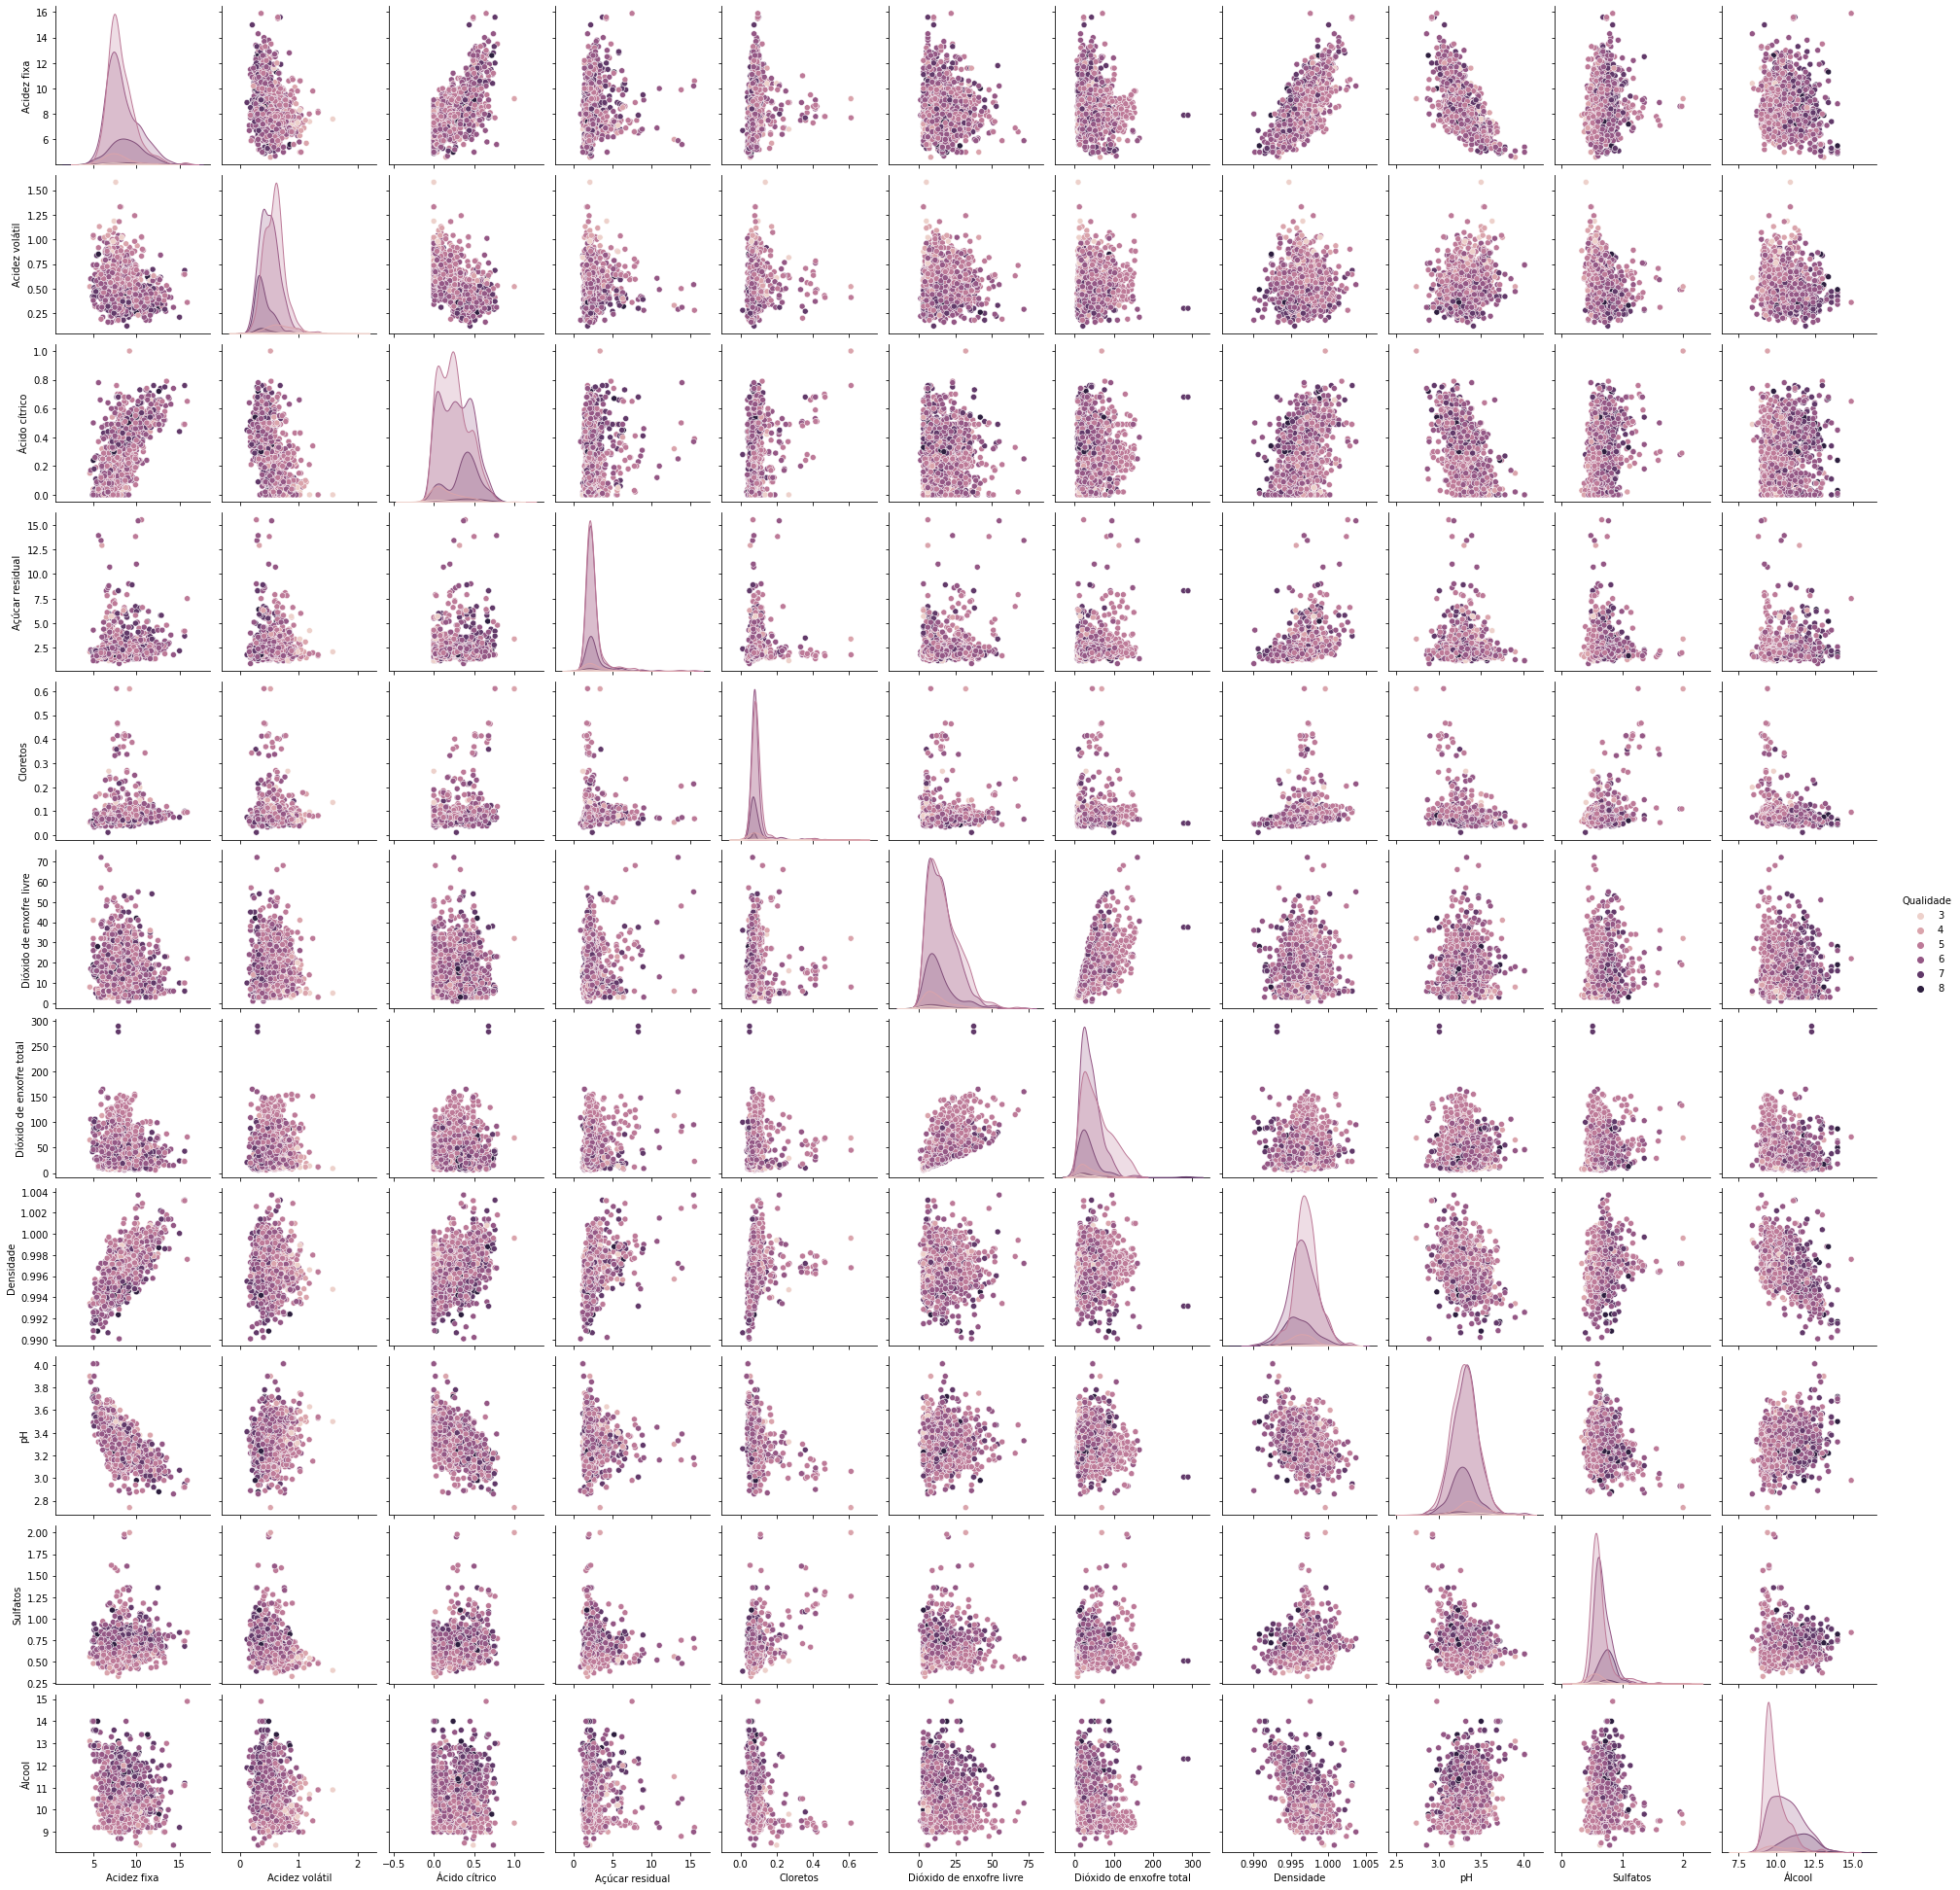

In [9]:
# Pairplot indicando as dispersões entre as variáveis (colunas)
sns.pairplot(tinto, hue="Qualidade")
plt.show()

 - Podemos verificar pelo gráfico Pairplot que a maioria das variáveis apresenta uma dispersão considerável entre si, e que apenas algumas variáveis apresentam certa correlação visível, como:
  - **pH** e **acidez fixa**;
  - e também **densidade** e **acidez fixa**.

### Mapa de calor:

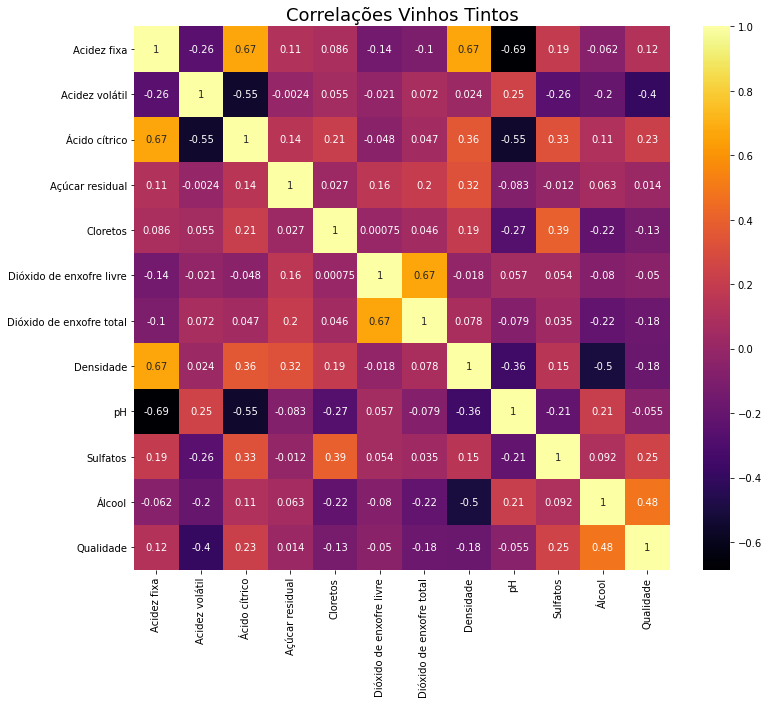

In [10]:
# Define o tamanho da figura
plt.figure(figsize=(12, 10))

# Define o Titulo
plt.title("Correlações Vinhos Tintos", size=18)

# Mapa de Calor da Correlação
sns.heatmap(tinto.corr(), cmap="inferno", annot=True)
plt.show()

 - Pelo do **mapa de calor** das correlações entre as variáveis, podemos verificar que as maiores correlações são entre as variáveis:
  - **pH** e **acidez fixa**
  - **densidade** e **acidez fixa**, conforme já havia sido constatado ao analizar o Pairplot;
E também entre as variáveis de:
  - **dióxido de enxofre total** e **dióxido de enxofre livre**; e
  - **ácido cítrico** e **acidez fixa**.

### Gráficos Distplot das colunas para verificação da distribuição dos dados:

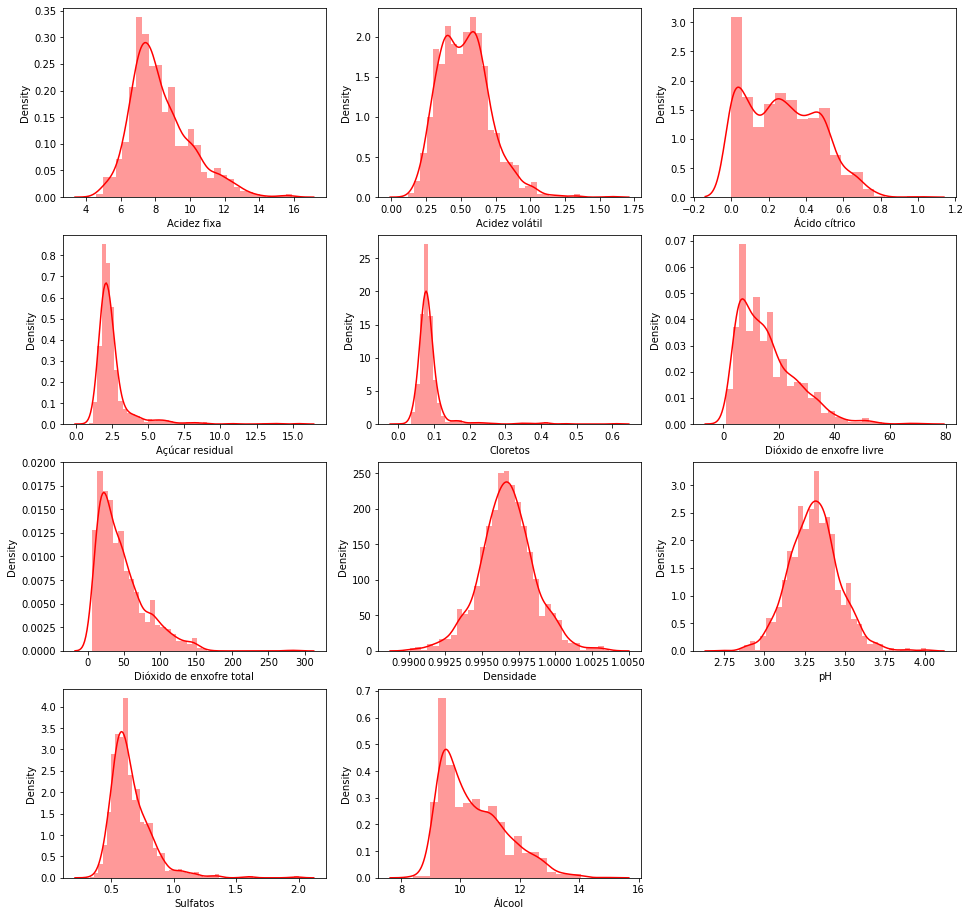

In [11]:
# Define o tamanho da figura
figure = plt.figure(figsize=(16, 16))

# Cria a variável "colunas", que são todas as colunas do dataset menos a coluna "Qualidade" (coluna target)
colunas = tinto.columns[:-1]

# Laço para criação dos boxplots
for i in range(len(colunas)):
    figure.add_subplot(4, 3, i+1)
    subplot_title = tinto[colunas[i]].name
    sns.distplot(tinto[colunas[i]], color="r", kde=True)

plt.show()

### Gráficos de *Boxplot* das colunas para verificação de valores atípicos (*outliers*):

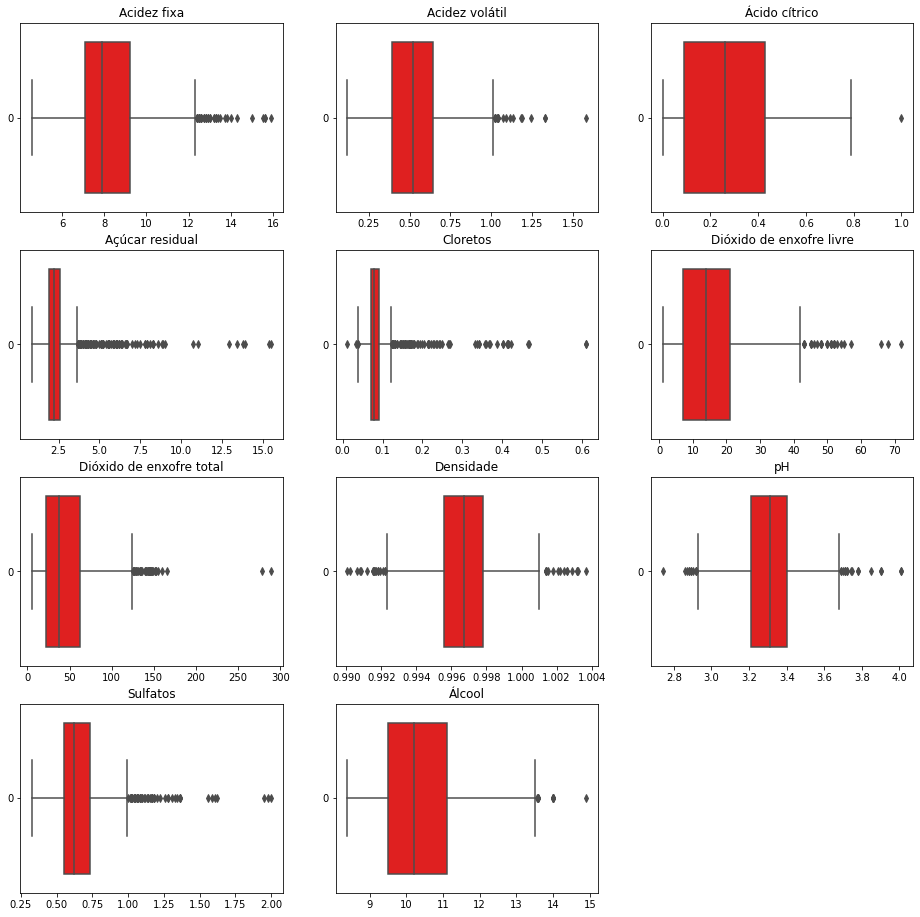

In [12]:
# Define o tamanho da figura
figure = plt.figure(figsize=(16, 16))

# Cria a variável "colunas", que são todas as colunas do dataset menos a coluna "Qualidade" (coluna target)
colunas = tinto.columns[:-1]

# Laço para criação dos boxplots
for i in range(len(colunas)):
    figure.add_subplot(4, 3, i+1)
    subplot_title = tinto[colunas[i]].name
    sns.boxplot(data=tinto[colunas[i]], color="r", orient="h").set_title(subplot_title)

plt.show()

In [13]:
# Criando uma cópia para fazer a remoção de outliers
tinto_sem_outliers = tinto.copy()

In [14]:
# Verificando o % de valores outliers em cada coluna, de acordo com o IQR (Amplitude interquartil) de cada variável

outliers_lista = []
num_linhas = tinto_sem_outliers.shape[0]
for i in range(len(colunas)):
    # IQR
    Q1 = np.percentile(tinto_sem_outliers[colunas[i]], 25, interpolation = "midpoint")
    Q3 = np.percentile(tinto_sem_outliers[colunas[i]], 75, interpolation = "midpoint")
    IQR = Q3 - Q1

    tamanho_lista_atual = len(outliers_lista)
    
    # Acima do limite superior
    acima = tinto_sem_outliers[colunas[i]] >= (Q3+1.5*IQR)
    array_acima = np.where(acima)
    for j in array_acima:
        for v in j:
            outliers_lista.append(v)

    # Abaixo do limite inferior
    inferior = tinto_sem_outliers[colunas[i]] <= (Q1-1.5*IQR)
    array_inferior = np.where(inferior)
    for j in array_inferior:
        for v in j:
            outliers_lista.append(v)
            
    perc_outliers = round(((len(outliers_lista) - tamanho_lista_atual ) / num_linhas) * 100, 2)
    print(f"Percentual de outliers da coluna {tinto_sem_outliers[colunas[i]].name}: {perc_outliers}%")

Percentual de outliers da coluna Acidez fixa: 3.02%
Percentual de outliers da coluna Acidez volátil: 1.4%
Percentual de outliers da coluna Ácido cítrico: 0.07%
Percentual de outliers da coluna Açúcar residual: 9.27%
Percentual de outliers da coluna Cloretos: 6.4%
Percentual de outliers da coluna Dióxido de enxofre livre: 2.13%
Percentual de outliers da coluna Dióxido de enxofre total: 3.31%
Percentual de outliers da coluna Densidade: 2.58%
Percentual de outliers da coluna pH: 2.06%
Percentual de outliers da coluna Sulfatos: 4.05%
Percentual de outliers da coluna Álcool: 0.96%


 - Analisando os Boxplots das variáveis e o percentual de outliers por coluna, podemos verificar que **todas as colunas possuem outliers**. 
 
Porém, como não é possível determinar se essas informações são realmente outliers para dada característica do vinho e também para não retirar precipitadamente muitas linhas do nosso dataset, optamos por remover apenas as linhas que possuem mais de um outlier. 

Ou seja, serão `dropadas` **as linhas que apresentam duas ou mais colunas com um valor outlier segundo o seu IQR**.

In [15]:
# Remoção das linhas que possuem mais de uma coluna com um valor outlier

duplicados = []
outliers_lista.sort()
for i in outliers_lista:
    if outliers_lista.count(i) > 1:
        if i not in duplicados:
            duplicados.append(i)
            
tinto_sem_outliers.drop(duplicados, inplace=True)
tinto_sem_outliers.reset_index(drop=True, inplace=True)

In [16]:
# Número de linhas dropadas
print(f"Número de linhas dropadas: {len(duplicados)}")

Número de linhas dropadas: 103


In [17]:
# Novo shape do dataset de Vinhos Tintos após a remoção das linhas com outliers
tinto_sem_outliers.shape

(1256, 12)

#### Frequência de ocorrência das classificações de qualidade dos vinhos tintos

In [18]:
# Quantidade normalizada de vinhos para cada classificação de qualidade
tinto_sem_outliers["Qualidade"].value_counts(normalize=True)

5    0.419586
6    0.402070
7    0.122611
4    0.038217
8    0.011146
3    0.006369
Name: Qualidade, dtype: float64

<AxesSubplot:xlabel='Qualidade', ylabel='count'>

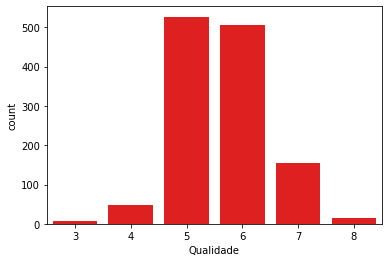

In [19]:
# Visualização da frequência de ocorrência das classificações de qualidade dos vinhos tintos
sns.countplot(tinto_sem_outliers["Qualidade"], color="red")

 - Como podemos verificar acima, o número de ocorrências das classificações 5 e 6 correspondem a mais de 80% de todo o dataset.

---------------
--------------------

## Criando o modelo de *__Regressão Linear__*

In [20]:
# Separa no X e y
X = tinto_sem_outliers.drop(["Qualidade"], axis=1)
y = tinto_sem_outliers["Qualidade"]

# Separa a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Instanciar a classe do StandardScaler
scaler = StandardScaler()

# Transformação dos dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [22]:
# Instancia o modelo
model = LinearRegression()

# Ajuste dos dados, ou seja, iremos passar os dados para o modelo aprender com eles
model.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a previsão para a base de teste
y_pred = model.predict(X_test_std)

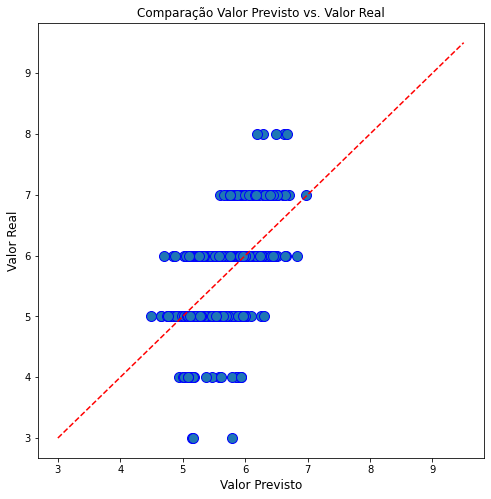

In [23]:
# Vamos criar um gráfico para comparar os Valores Reais com os Previstos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title("Comparação Valor Previsto vs. Valor Real", fontsize=12)
plt.ylabel("Valor Real", fontsize=12)
plt.xlabel("Valor Previsto", fontsize=12)

# Mostra os valores previstos e originais
xl = np.arange(min(y_test), 1.2 * max(y_test),(max(y_test) - min(y_test)) / 10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [24]:
# Calcula o R2 score
R2 = r2_score(y_test, y_pred)

# Print do valor do R2
print("R2: ", R2)

R2:  0.36836904161144157


In [25]:
# Feature Importance - Regressão Linear
coefs = model.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)
    
dictionary = {"Features": list_feature,
              "Scores": list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=["Scores"], ascending=False)
df_features.reset_index(inplace=True, drop=True)
df_features

Features    Scores
0                     Álcool  0.295245
1                   Sulfatos  0.159076
2                Acidez fixa  0.078840
3   Dióxido de enxofre livre  0.058526
4            Açúcar residual  0.032735
5                   Cloretos -0.036196
6                  Densidade -0.039173
7                         pH -0.071532
8              Ácido cítrico -0.097513
9   Dióxido de enxofre total -0.098668
10            Acidez volátil -0.183845

## Conclusão a respeito do modelo de Regressão Linear:
 - Como podemos verificar através do R2 obtido para este modelo (0,37), e também através do gráfico que compara os valores preditos com os valores reais, chegamos a conclusão que um modelo de Regressão Linear para prever qual a classificação de qualidade de um determinado vinho tinto, conforme suas características, __não é um bom modelo__.
 - Isso se explica pois a nossa variável target (Qualidade) tem como saída apenas valores discretos e se assemelham mais com classes de qualidade, ou seja, um modelo de classificação poderá explicar melhor estes dados.

--------------------------------
---------------------------------

## Criando o modelo de *__Regressão Logística__*

 - Para criar o modelo de Regressão Logística, primeiro vamos modificar a variável target (quality) da nossa base de dados.
 - Vamos assumir que valores __maiores ou iguais a 6__ pertencerão à __classe 1__, ou seja, serão considerados vinhos __bons__.
 - Da mesma forma, valores que forem __menores do que 6__ pertencerão à __classe 0__, e serão considerados vinhos __ruins__.

In [26]:
# Criando um novo dataframe para realizar a mudança da coluna target
tinto_log = tinto_sem_outliers.copy()

# Modificando a coluna "quality" seguindo os critérios de qualidade descritos acima
tinto_log["Qualidade"] = np.where(tinto_log["Qualidade"]>=6, 1, 0)

# Visualizando o dataset após a mudança
tinto_log.head()

Acidez fixa  Acidez volátil  Ácido cítrico  Açúcar residual  Cloretos  \
0          7.4            0.70           0.00              1.9     0.076   
1          7.8            0.88           0.00              2.6     0.098   
2          7.8            0.76           0.04              2.3     0.092   
3         11.2            0.28           0.56              1.9     0.075   
4          7.4            0.66           0.00              1.8     0.075   

   Dióxido de enxofre livre  Dióxido de enxofre total  Densidade    pH  \
0                      11.0                      34.0     0.9978  3.51   
1                      25.0                      67.0     0.9968  3.20   
2                      15.0                      54.0     0.9970  3.26   
3                      17.0                      60.0     0.9980  3.16   
4                      13.0                      40.0     0.9978  3.51   

   Sulfatos  Álcool  Qualidade  
0      0.56     9.4          0  
1      0.68     9.8          0  
2      0.65     9.8          0  
3      0.58     9.8          1  
4      0.56     9.4          0

In [27]:
# Verificando a frequência das classes 0 e 1 na coluna target
tinto_log["Qualidade"].value_counts(normalize=True)

1    0.535828
0    0.464172
Name: Qualidade, dtype: float64

 - Neste caso, como a frequência apresenta uma leve diferença, vamos utilizar o parâmetro `stratify` na hora de separar em treino e teste. Este parâmetro mantém a diferença de frequência do dataset para os dados de treino e de teste.

In [28]:
# Separando em X e y
X = tinto_log.drop(["Qualidade"], axis=1) # X serão todas as nossas variáveis, menos a coluna target
y = tinto_log["Qualidade"] # o y será a nossa coluna target

# Separa a base em treino e teste, passando o y para o parâmetro "stratify"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [29]:
# instanciar a classe do StandardScaler
scaler = StandardScaler()

# Transformação dos dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [30]:
# Instancia o modelo
model = LogisticRegression()

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
model.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred = model.predict(X_test_std)

In [31]:
# Print do classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       175
           1       0.77      0.77      0.77       202

    accuracy                           0.75       377
   macro avg       0.75      0.75      0.75       377
weighted avg       0.75      0.75      0.75       377



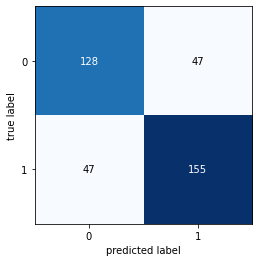

In [32]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da Matrix
plot_confusion_matrix(conf_mat=cm)
plt.show()

## Conclusão a respeito do modelo de Regressão Logística:

 - Através do resultado obtido, podemos concluir que este __é um bom modelo__, e consegue representar nossos dados com uma acurácia de 75%, e uma diferença relativamente baixa entre a precisão e o recall das classes 0 e 1.

 - Ou seja, podemos concluir que um modelo de Classificação, como a Regressão Logística, é o mais indicado para analisarmos o dataset a respeito da qualidade de vinhos tintos.

----------------------
---------------------
------------------------

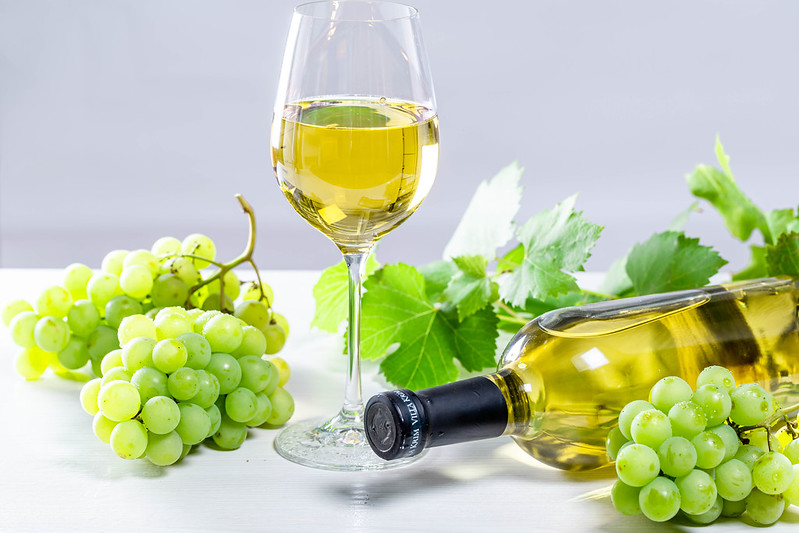

# Explorando os dados sobre *__VINHOS BRANCOS__*

In [33]:
# Criando o dataframe para o arquivo sobre a qualidade de vinhos brancos
branco = pd.read_csv("./datasets/winequality-white.csv", sep=";")
branco.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

# Traduzindo os nomes das colunas no dataset de *__VINHOS BRANCOS__*

In [34]:
branco.columns = ["Acidez fixa", "Acidez volátil", "Ácido cítrico", "Açúcar residual", "Cloretos", 
                 "Dióxido de enxofre livre", "Dióxido de enxofre total", "Densidade", "pH", "Sulfatos", 
                 "Álcool", "Qualidade"]
branco.head()

Acidez fixa  Acidez volátil  Ácido cítrico  Açúcar residual  Cloretos  \
0          7.0            0.27           0.36             20.7     0.045   
1          6.3            0.30           0.34              1.6     0.049   
2          8.1            0.28           0.40              6.9     0.050   
3          7.2            0.23           0.32              8.5     0.058   
4          7.2            0.23           0.32              8.5     0.058   

   Dióxido de enxofre livre  Dióxido de enxofre total  Densidade    pH  \
0                      45.0                     170.0     1.0010  3.00   
1                      14.0                     132.0     0.9940  3.30   
2                      30.0                      97.0     0.9951  3.26   
3                      47.0                     186.0     0.9956  3.19   
4                      47.0                     186.0     0.9956  3.19   

   Sulfatos  Álcool  Qualidade  
0      0.45     8.8          6  
1      0.49     9.5          6  
2      0.44    10.1          6  
3      0.40     9.9          6  
4      0.40     9.9          6

### Analisando o dataset de VINHOS BRANCOS

In [35]:
# Informações sobre as colunas, número de linhas por colunas e os tipos de dados de cada coluna
branco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Acidez fixa               4898 non-null   float64
 1   Acidez volátil            4898 non-null   float64
 2   Ácido cítrico             4898 non-null   float64
 3   Açúcar residual           4898 non-null   float64
 4   Cloretos                  4898 non-null   float64
 5   Dióxido de enxofre livre  4898 non-null   float64
 6   Dióxido de enxofre total  4898 non-null   float64
 7   Densidade                 4898 non-null   float64
 8   pH                        4898 non-null   float64
 9   Sulfatos                  4898 non-null   float64
 10  Álcool                    4898 non-null   float64
 11  Qualidade                 4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


 - Verificando as informações sobre o dataframe `branco`, podemos ver que ele possui 4898 linhas, 12 colunas, não tem nenhum dado faltante e cada coluna está em um formato numérico (float ou int). 
 Dessa forma, poderemos utilizar todas as colunas sem necessidade de tratá-las.

In [36]:
# Verificando a presença de dados faltantes (nulos)
print(f"Qtd de dados faltantes:\n{branco.isna().sum()}\n")

# Verificando o número de linhas duplicadas
print("\nQtd de linhas duplicadas: ", branco.duplicated().sum())

Qtd de dados faltantes:
Acidez fixa                 0
Acidez volátil              0
Ácido cítrico               0
Açúcar residual             0
Cloretos                    0
Dióxido de enxofre livre    0
Dióxido de enxofre total    0
Densidade                   0
pH                          0
Sulfatos                    0
Álcool                      0
Qualidade                   0
dtype: int64


Qtd de linhas duplicadas:  937


- Como pode ser visto acima, existem 937 linhas duplicadas no dataset de Vinhos Brancos (branco).
 Por esse motivo, para não comprometer o estudo, essas linhas serão removidas.

In [37]:
# Removendo as 937 linhas duplicadas
branco.drop_duplicates(inplace=True, ignore_index=True)

In [38]:
# Verificando o novo shape do dataframe de vinhos tintos
branco.shape

(3961, 12)

In [39]:
# Principais variáveis descritivas por coluna
branco.describe()

Acidez fixa  Acidez volátil  Ácido cítrico  Açúcar residual  \
count  3961.000000     3961.000000    3961.000000      3961.000000   
mean      6.839346        0.280538       0.334332         5.914819   
std       0.866860        0.103437       0.122446         4.861646   
min       3.800000        0.080000       0.000000         0.600000   
25%       6.300000        0.210000       0.270000         1.600000   
50%       6.800000        0.260000       0.320000         4.700000   
75%       7.300000        0.330000       0.390000         8.900000   
max      14.200000        1.100000       1.660000        65.800000   

          Cloretos  Dióxido de enxofre livre  Dióxido de enxofre total  \
count  3961.000000               3961.000000               3961.000000   
mean      0.045905                 34.889169                137.193512   
std       0.023103                 17.210021                 43.129065   
min       0.009000                  2.000000                  9.000000   
25%       0.035000                 23.000000                106.000000   
50%       0.042000                 33.000000                133.000000   
75%       0.050000                 45.000000                166.000000   
max       0.346000                289.000000                440.000000   

         Densidade           pH     Sulfatos       Álcool    Qualidade  
count  3961.000000  3961.000000  3961.000000  3961.000000  3961.000000  
mean      0.993790     3.195458     0.490351    10.589358     5.854835  
std       0.002905     0.151546     0.113523     1.217076     0.890683  
min       0.987110     2.720000     0.220000     8.000000     3.000000  
25%       0.991620     3.090000     0.410000     9.500000     5.000000  
50%       0.993500     3.180000     0.480000    10.400000     6.000000  
75%       0.995710     3.290000     0.550000    11.400000     6.000000  
max       1.038980     3.820000     1.080000    14.200000     9.000000

# Pairplot da base de vinhos brancos:

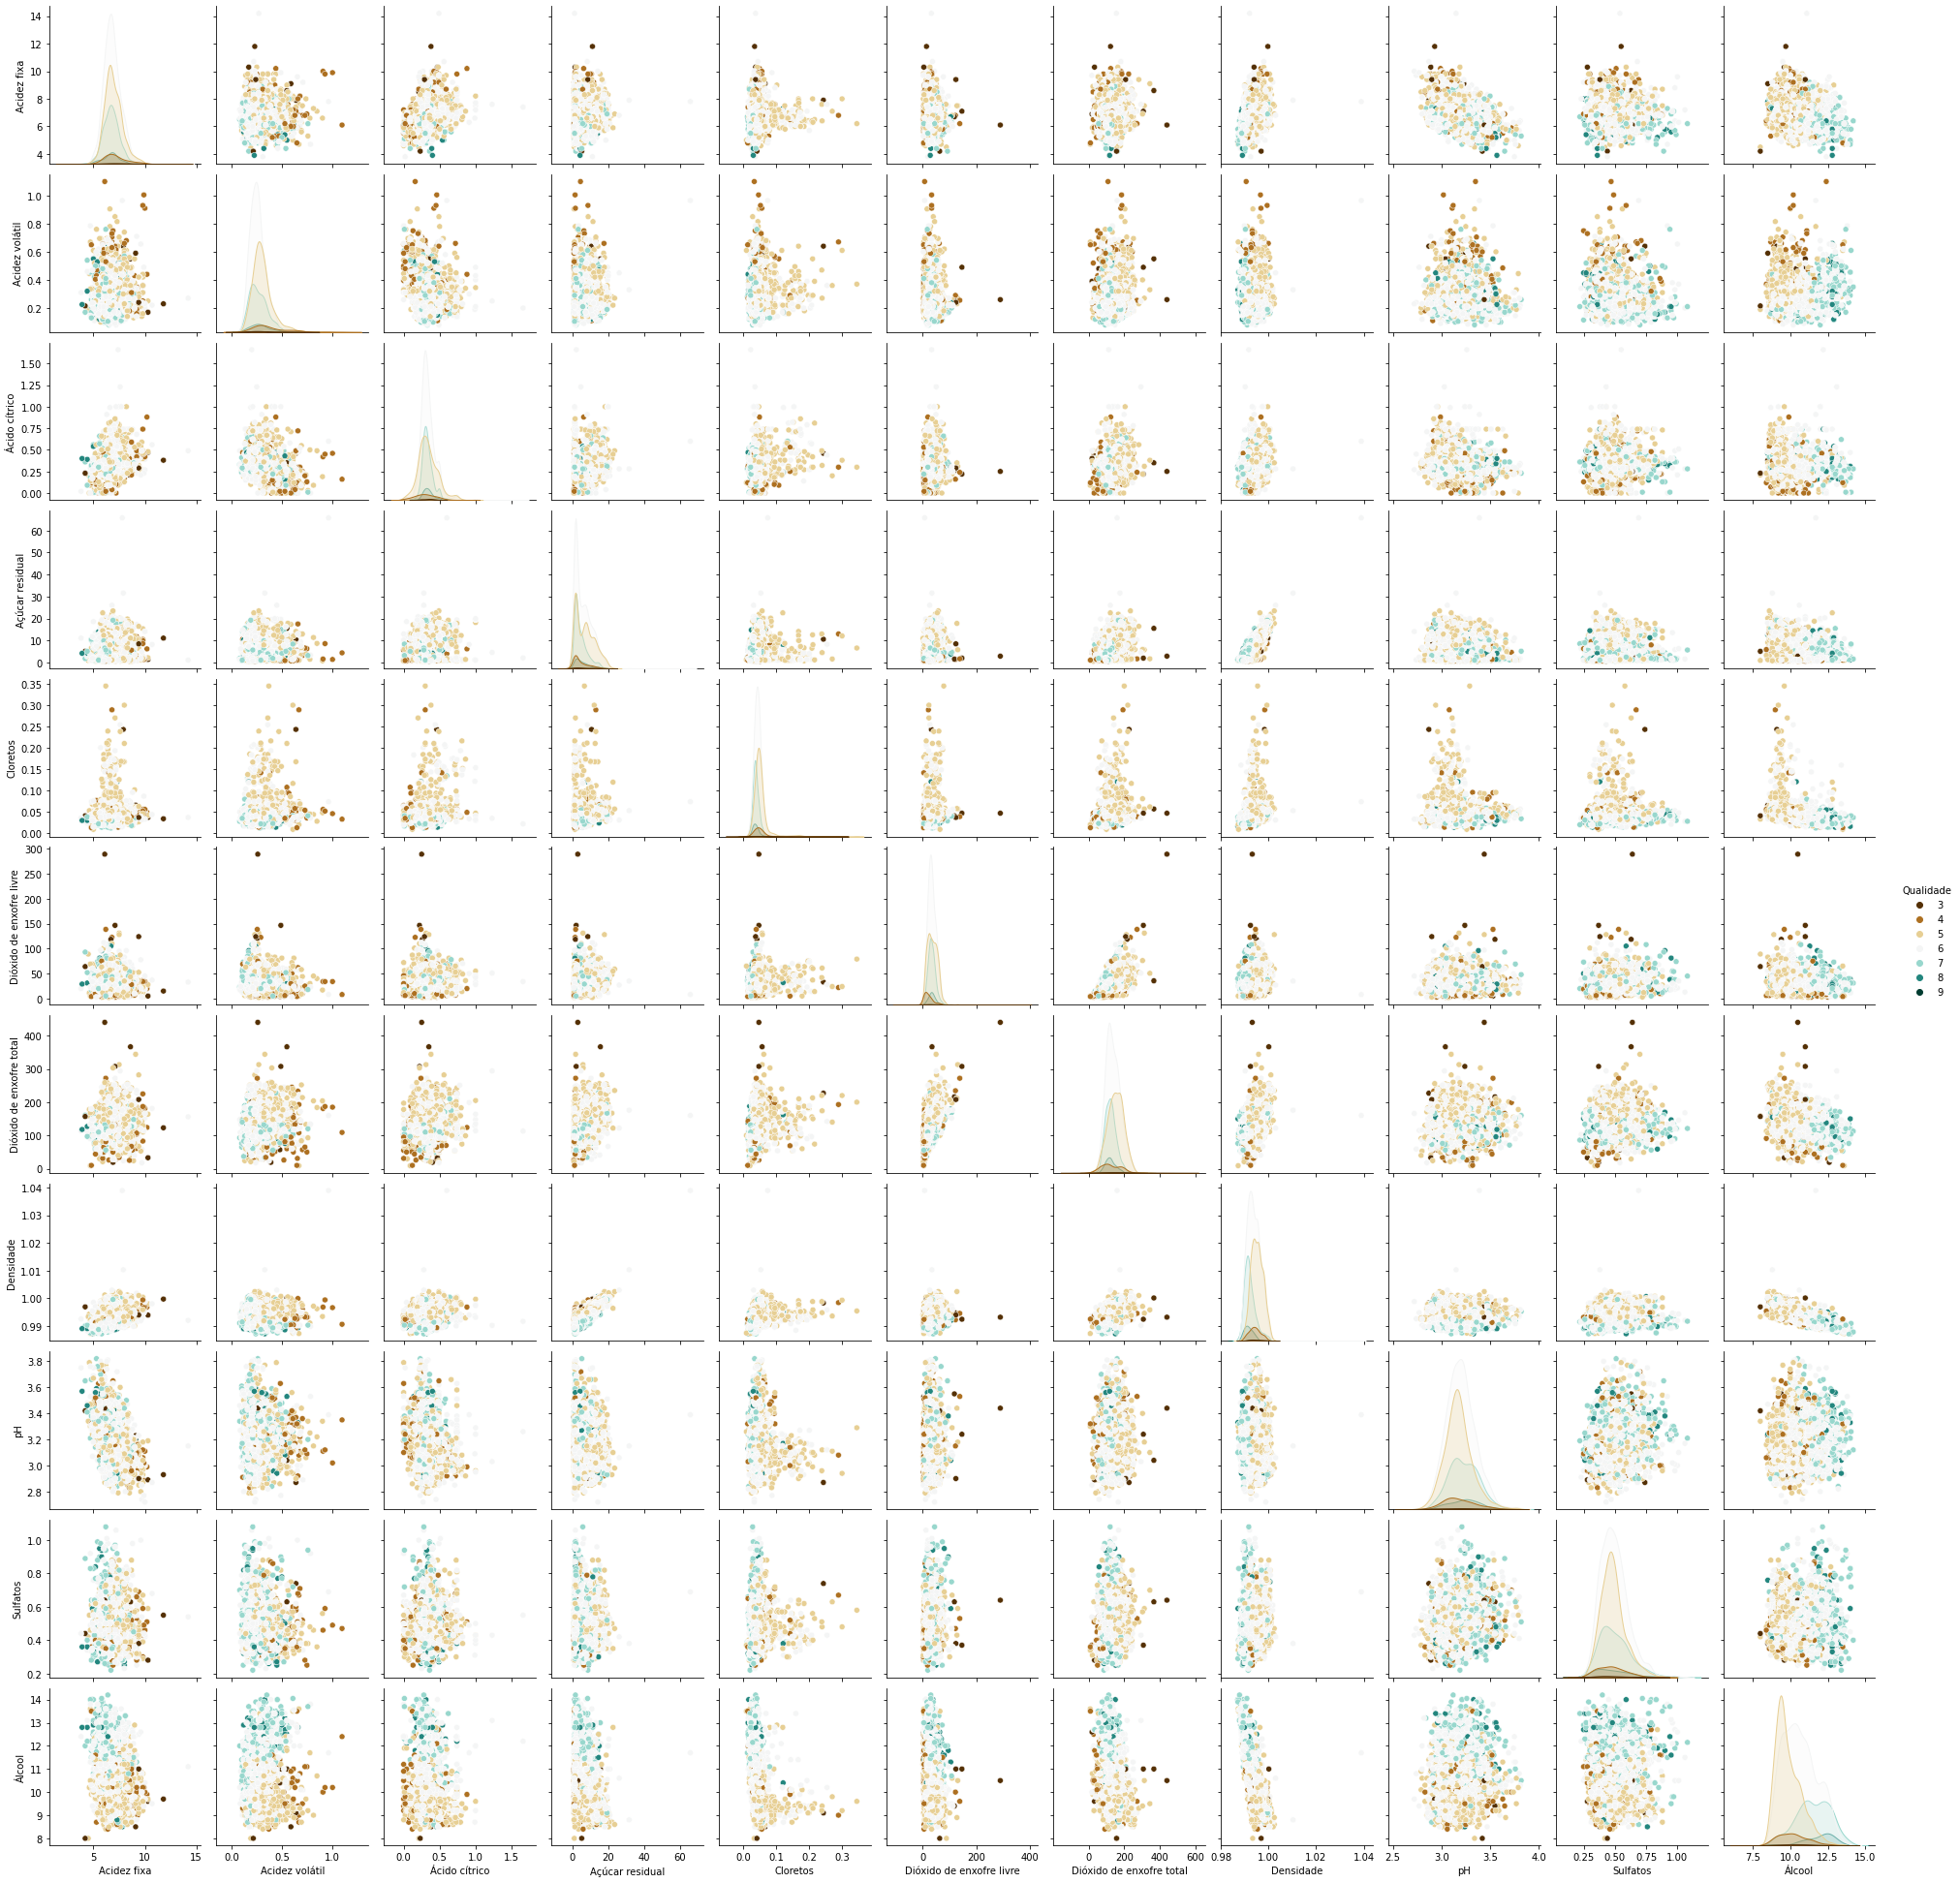

In [40]:
# Pairplot indicando as dispersões entre as variáveis (colunas)
sns.pairplot(branco, hue="Qualidade", palette="BrBG")
plt.show()

 - Assim como ocorreu ao analisar os dados disponíveis para a base de vinhos tintos; podemos verificar pelo gráfico Pairplot que a maioria das variáveis apresenta uma dispersão considerável entre si, e que apenas algumas variáveis apresentam certa correlação visível, como:
  - **pH** e **acidez fixa**;
  - e também **densidade** e **acidez fixa**.

 ## Mapa de calor:

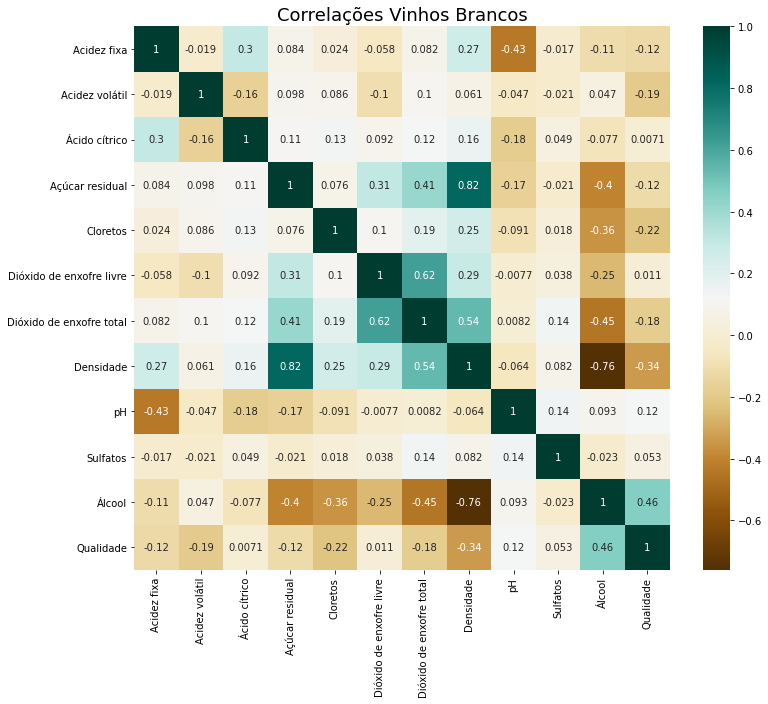

In [41]:
# Define o tamanho da figura
plt.figure(figsize=(12, 10))

# Define o Titulo
plt.title("Correlações Vinhos Brancos", size=18)

# Mapa de Calor da Correlação
sns.heatmap(branco.corr(), cmap="BrBG", annot=True)
plt.show()

- Pelo do **mapa de calor** das correlações entre as variáveis, podemos verificar que as maiores correlações são entre as variáveis:
  - **pH** e **acidez fixa**,
  - **densidade** e **acidez fixa**, conforme já havia sido constatado ao analizar o Pairplot;
  - **sulfatos** e **acidez fixa**,
E também entre as variáveis de:
  - **dióxido de enxofre total** e **dióxido de enxofre livre**; e
  - **ácido cítrico** e **acidez fixa**.

### Gráficos Distplot das colunas para verificação da distribuição dos dados:

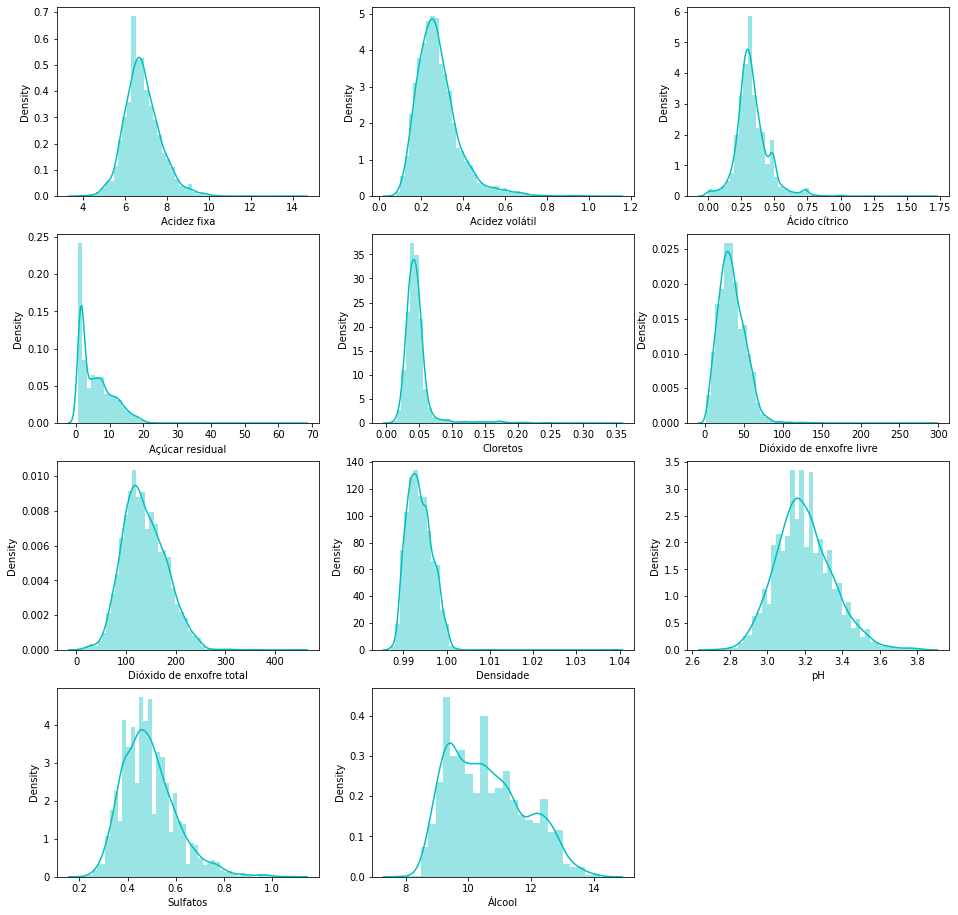

In [42]:
# Define o tamanho da figura
figure = plt.figure(figsize=(16, 16))

# Cria a variável "colunas", que são todas as colunas do dataset menos a coluna "qualidade" (coluna target)
colunas = branco.columns[:-1]

# Laço para criação dos boxplots
for i in range(len(colunas)):
    figure.add_subplot(4, 3, i+1)
    subplot_title = branco[colunas[i]].name
    sns.distplot(branco[colunas[i]], kde=True, color="c")

plt.show()

### Gráficos de *Boxplot* das colunas para verificação de valores atípicos (*outliers*):

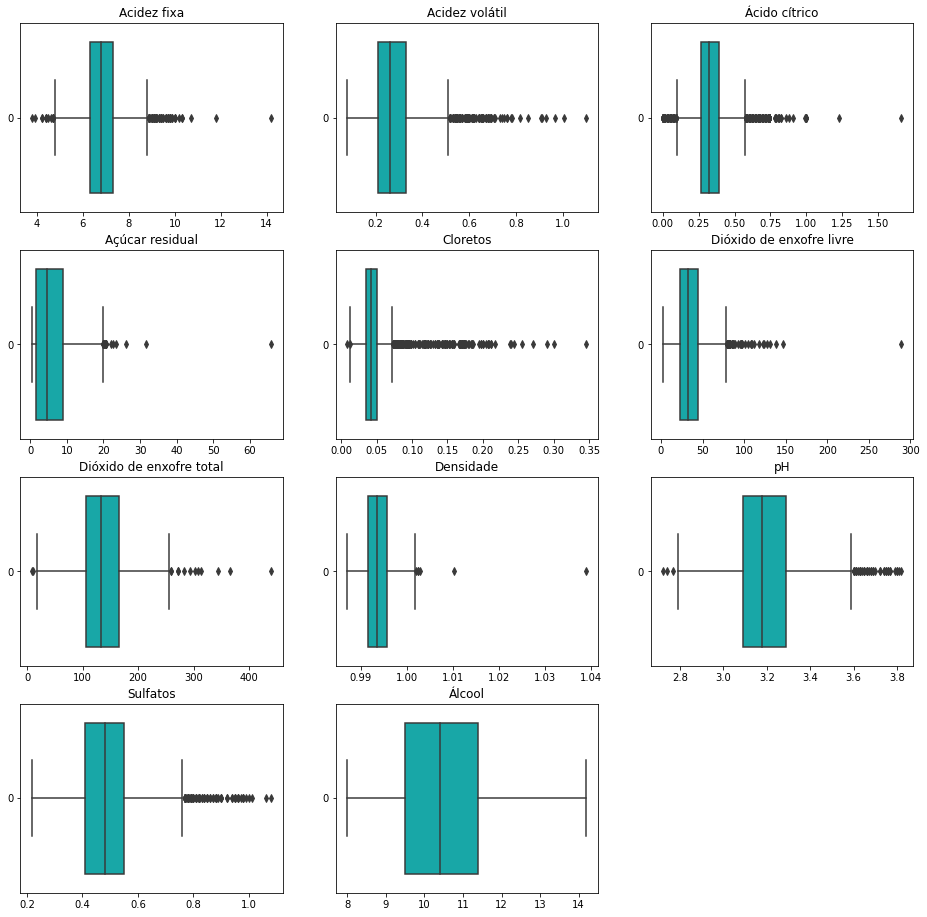

In [43]:
# Define o tamanho da figura
figure = plt.figure(figsize=(16, 16))

# Cria a variável "colunas", que são todas as colunas do dataset menos a coluna "Qualidade" (coluna target)
colunas = branco.columns[:-1]

# Laço para criação dos boxplots
for i in range(len(colunas)):
    figure.add_subplot(4, 3, i+1)
    subplot_title = branco[colunas[i]].name
    sns.boxplot(data=branco[colunas[i]], color="c", orient="h").set_title(subplot_title)

plt.show()

In [44]:
# Criando uma cópia do dataset para remover os outliers
branco_sem_outliers = branco.copy()

In [45]:
# Verificando o % de valores outliers em cada coluna, de acordo com o IQR (Amplitude interquartil) de cada variável

outliers_lista = []
num_linhas = branco_sem_outliers.shape[0]
for i in range(len(colunas)):
    # IQR
    Q1 = np.percentile(branco_sem_outliers[colunas[i]], 25, interpolation = "midpoint")
    Q3 = np.percentile(branco_sem_outliers[colunas[i]], 75, interpolation = "midpoint")
    IQR = Q3 - Q1

    tamanho_lista_atual = len(outliers_lista)
    
    # Acima do limite superior
    acima = branco_sem_outliers[colunas[i]] >= (Q3+1.5*IQR)
    array_acima = np.where(acima)
    for j in array_acima:
        for v in j:
            outliers_lista.append(v)

    # Abaixo do limite inferior
    inferior = branco_sem_outliers[colunas[i]] <= (Q1-1.5*IQR)
    array_inferior = np.where(inferior)
    for j in array_inferior:
        for v in j:
            outliers_lista.append(v)
            
    perc_outliers = round(((len(outliers_lista) - tamanho_lista_atual ) / num_linhas) * 100, 2)
    print(f"Percentual de outliers da coluna {branco_sem_outliers[colunas[i]].name}: {perc_outliers}%")

Percentual de outliers da coluna Acidez fixa: 3.31%
Percentual de outliers da coluna Acidez volátil: 3.61%
Percentual de outliers da coluna Ácido cítrico: 5.63%
Percentual de outliers da coluna Açúcar residual: 0.4%
Percentual de outliers da coluna Cloretos: 4.49%
Percentual de outliers da coluna Dióxido de enxofre livre: 1.21%
Percentual de outliers da coluna Dióxido de enxofre total: 0.38%
Percentual de outliers da coluna Densidade: 0.15%
Percentual de outliers da coluna pH: 1.16%
Percentual de outliers da coluna Sulfatos: 2.42%
Percentual de outliers da coluna Álcool: 0.0%


 - Analisando os Boxplots das variáveis e o percentual de outliers por coluna, podemos verificar que **todas as colunas, com exceção do Álcool, possuem outliers**. 
 
Porém, como não é possível determinar se essas informações são realmente outliers para dada característica do vinho e também para não retirar precipitadamente muitas linhas do nosso dataset, optamos por remover apenas as linhas que possuem mais de um outlier. 

Ou seja, serão `dropadas` **as linhas que apresentam duas ou mais colunas com um valor outlier segundo o seu IQR**.

In [46]:
# Remoção das linhas que possuem mais de uma coluna com um valor outlier

duplicados = []
outliers_lista.sort()
for i in outliers_lista:
    if outliers_lista.count(i) > 1:
        if i not in duplicados:
            duplicados.append(i)
            
print(f"Número de linhas com mais de um outlier: {len(duplicados)}")
            
branco_sem_outliers.drop(duplicados, inplace=True)
branco_sem_outliers.reset_index(drop=True, inplace=True)

Número de linhas com mais de um outlier: 150


In [47]:
branco_sem_outliers.shape

(3811, 12)

### Frequência de ocorrência das classificações de qualidade dos vinhos brancos

In [48]:
# Quantidade normalizada de vinhos para cada classificação de qualidade
branco_sem_outliers["Qualidade"].value_counts(normalize=True)

6    0.456048
5    0.292049
7    0.178431
4    0.034637
8    0.033849
3    0.003674
9    0.001312
Name: Qualidade, dtype: float64

<AxesSubplot:xlabel='Qualidade', ylabel='count'>

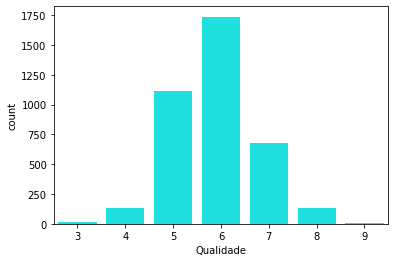

In [49]:
# Visualização da frequência de ocorrência das classificações de qualidade dos vinhos brancos
sns.countplot(branco_sem_outliers["Qualidade"], color="cyan")

- Como podemos verificar acima, o número de ocorrências das classificações 5 e 6 corresponde a mais de 75% de todo o dataset.

---------------
--------------------

## Criando o modelo de *__Regressão Linear__*

In [50]:
# Separa no X e y
X = branco_sem_outliers.drop(["Qualidade"], axis=1)
y = branco_sem_outliers["Qualidade"]

# Separa a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# Instancia a classe do StandardScaler
scaler = StandardScaler()

# Transformação dos dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [52]:
# Instancia o modelo
model = LinearRegression()

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
model.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred = model.predict(X_test_std)

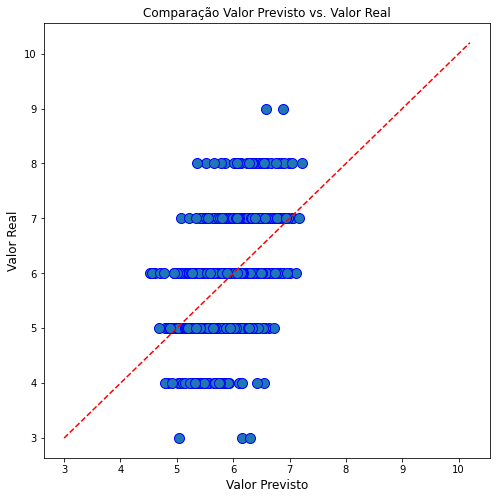

In [53]:
# Vamos criar um gráfico para comparar os Valores Reais com os Previstos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title("Comparação Valor Previsto vs. Valor Real", fontsize=12)
plt.ylabel("Valor Real", fontsize=12)
plt.xlabel("Valor Previsto", fontsize=12)

# Mostra os valores previstos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [54]:
# Calcula o R2 score
R2 = r2_score(y_test, y_pred)

# Print do valor do R2
print("R2: ", R2)

R2:  0.2909296787522352


In [55]:
# Feature Importance - Regressão Linear
coefs = model.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)
    
dictionary = {"Features": list_feature,
              "Scores": list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=["Scores"], ascending=False)
df_features.reset_index(inplace=True, drop=True)
df_features

Features    Scores
0            Açúcar residual  0.395150
1                     Álcool  0.192573
2                         pH  0.160765
3   Dióxido de enxofre livre  0.124431
4                Acidez fixa  0.087828
5                   Sulfatos  0.085537
6              Ácido cítrico  0.020518
7                   Cloretos -0.008661
8   Dióxido de enxofre total -0.042842
9             Acidez volátil -0.134511
10                 Densidade -0.511206

### Conclusão sobre o modelo de Regressão Linear para a base de Vinhos Brancos:

- Como podemos verificar ao observar o R2 obtido para este modelo (0,29) e também ao analisar o gráfico que compara os valores previstos e os valores reais, chegamos a conclusão de que um modelo de Regressão Linear para prevar qual a classificação de qualidade de um determinado vinho branco, conforme suas características, **não é um bom modelo**.

- Isso se explica, pois a nossa variável target (Qualidade) tem como saída apenas valores discretos e que se assemelham mais com classes de qualidade, ou seja, um modelo de classificação poderá explicar melhor esses dados.

--------------------------------
---------------------------------

## Criando o modelo de *__Regressão Logística__*

- Para criar o modelo de Regressão Logística, primeiro vamos modificar a variável target (qualidade) da nossa base de dados.
- Vamos assumir que valores **maiores ou iguais à 6** pertencerão à **classe 1**, ou seja, serão considerados vinhos **bons**.
- Já os valores que forem **menores do que 6** pertencerão à **classe 0** e serão considerados vinhos **ruins**. 

In [56]:
# Criando um dataframe para realizar a mudança da coluna target
branco_log = branco_sem_outliers.copy()

# Modificando a coluna "Qualidade" seguindo os critérios descritos acima
branco_log["Qualidade"] = np.where(branco_log["Qualidade"]>=6, 1, 0)

# Visualizando o dataset após a mudança
branco_log.head()

Acidez fixa  Acidez volátil  Ácido cítrico  Açúcar residual  Cloretos  \
0          7.0            0.27           0.36             20.7     0.045   
1          6.3            0.30           0.34              1.6     0.049   
2          8.1            0.28           0.40              6.9     0.050   
3          7.2            0.23           0.32              8.5     0.058   
4          6.2            0.32           0.16              7.0     0.045   

   Dióxido de enxofre livre  Dióxido de enxofre total  Densidade    pH  \
0                      45.0                     170.0     1.0010  3.00   
1                      14.0                     132.0     0.9940  3.30   
2                      30.0                      97.0     0.9951  3.26   
3                      47.0                     186.0     0.9956  3.19   
4                      30.0                     136.0     0.9949  3.18   

   Sulfatos  Álcool  Qualidade  
0      0.45     8.8          1  
1      0.49     9.5          1  
2      0.44    10.1          1  
3      0.40     9.9          1  
4      0.47     9.6          1

In [57]:
# Verificando a frequência das classes 0 e 1 na coluna target

branco_log["Qualidade"].value_counts(normalize=True)

1    0.669641
0    0.330359
Name: Qualidade, dtype: float64

- Neste caso, como a frequência aparesenta uma leve diferença, vamos utilizar o parâmetro `stratify` no momento de separar a base em treino e teste.
Esse parâmetro mantém a diferença de frequência do dataset para os dados de treino e de teste.

In [58]:
# Seprando em X e y
X = branco_log.drop(["Qualidade"], axis=1)
y = branco_log["Qualidade"]

# Separa a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [59]:
# instanciar a classe do StandardScaler
scaler = StandardScaler()

# Transformação dos dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [60]:
# Instancia o modelo
model = LogisticRegression()

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
model.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred = model.predict(X_test_std)

In [61]:
# Print do classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.53      0.57       378
           1       0.78      0.85      0.81       766

    accuracy                           0.74      1144
   macro avg       0.71      0.69      0.69      1144
weighted avg       0.73      0.74      0.73      1144



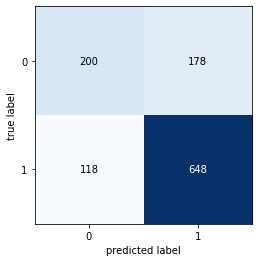

In [62]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da Matrix
plot_confusion_matrix(conf_mat=cm)
plt.show()

## Conclusão a respeito do modelo de Regressão Logística:

 - Ao analisar o resultado obtido, podemos concluir que esse **é um bom modelo** e consegue representar nossos dados com uma acurácia de 74% com uma diferença relativamente baixa entre a preciãos e recall das classes 0 e 1.
 
- Ou seja, podemos concluir que um modelo de Classificação, como a Regressão Logística, é o mais indicado para analisarmos o dataset a respeito da qualidade de vinhos brancos.


- É importante ressaltar que a quantidade de vinhos bons (**classe 1**), equivale, em termos práticos, ao dobro de vinhos ruins (**classe 0**). Por esse motivo, tanto *precision* quanto *recall* apresentam uma diferença significativa em seus valores para ambas as classes.

----------------------
---------------------
------------------------

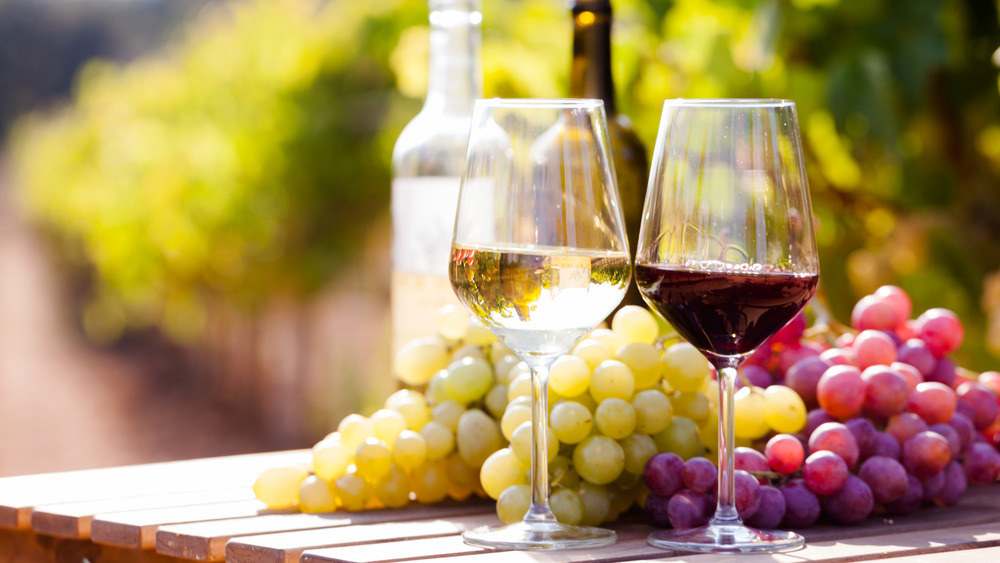

# Analisando os dois datasets concatenados

### Criando uma coluna em cada dataset que especifica o tipo de vinho

In [63]:
# Primeiro, criaremos o tipo de vinho "Tinto"
tinto_sem_outliers["Tipo"] = "Tinto"
tinto_sem_outliers.head()

Acidez fixa  Acidez volátil  Ácido cítrico  Açúcar residual  Cloretos  \
0          7.4            0.70           0.00              1.9     0.076   
1          7.8            0.88           0.00              2.6     0.098   
2          7.8            0.76           0.04              2.3     0.092   
3         11.2            0.28           0.56              1.9     0.075   
4          7.4            0.66           0.00              1.8     0.075   

   Dióxido de enxofre livre  Dióxido de enxofre total  Densidade    pH  \
0                      11.0                      34.0     0.9978  3.51   
1                      25.0                      67.0     0.9968  3.20   
2                      15.0                      54.0     0.9970  3.26   
3                      17.0                      60.0     0.9980  3.16   
4                      13.0                      40.0     0.9978  3.51   

   Sulfatos  Álcool  Qualidade   Tipo  
0      0.56     9.4          5  Tinto  
1      0.68     9.8          5  Tinto  
2      0.65     9.8          5  Tinto  
3      0.58     9.8          6  Tinto  
4      0.56     9.4          5  Tinto

In [64]:
# Criaremos o tipo de vinho "Branco"
branco_sem_outliers["Tipo"] = "Branco"
branco_sem_outliers.head()

Acidez fixa  Acidez volátil  Ácido cítrico  Açúcar residual  Cloretos  \
0          7.0            0.27           0.36             20.7     0.045   
1          6.3            0.30           0.34              1.6     0.049   
2          8.1            0.28           0.40              6.9     0.050   
3          7.2            0.23           0.32              8.5     0.058   
4          6.2            0.32           0.16              7.0     0.045   

   Dióxido de enxofre livre  Dióxido de enxofre total  Densidade    pH  \
0                      45.0                     170.0     1.0010  3.00   
1                      14.0                     132.0     0.9940  3.30   
2                      30.0                      97.0     0.9951  3.26   
3                      47.0                     186.0     0.9956  3.19   
4                      30.0                     136.0     0.9949  3.18   

   Sulfatos  Álcool  Qualidade    Tipo  
0      0.45     8.8          6  Branco  
1      0.49     9.5          6  Branco  
2      0.44    10.1          6  Branco  
3      0.40     9.9          6  Branco  
4      0.47     9.6          6  Branco

In [65]:
# Verificando o tamanho do dataset de vinhos tintos com a inclusão da coluna Tipo
tinto_sem_outliers.shape

(1256, 13)

In [66]:
# Verificando o tamanho do dataset de vinhos brancos com a inclusão da coluna Tipo
branco_sem_outliers.shape

(3811, 13)

### Concatenando os datasets

In [67]:
vinhos = pd.concat([tinto_sem_outliers, branco_sem_outliers], ignore_index=True)

# Verificando as primeiras linhas do dataset concatenado e com a inclusão da coluna de tipo
vinhos.head()

Acidez fixa  Acidez volátil  Ácido cítrico  Açúcar residual  Cloretos  \
0          7.4            0.70           0.00              1.9     0.076   
1          7.8            0.88           0.00              2.6     0.098   
2          7.8            0.76           0.04              2.3     0.092   
3         11.2            0.28           0.56              1.9     0.075   
4          7.4            0.66           0.00              1.8     0.075   

   Dióxido de enxofre livre  Dióxido de enxofre total  Densidade    pH  \
0                      11.0                      34.0     0.9978  3.51   
1                      25.0                      67.0     0.9968  3.20   
2                      15.0                      54.0     0.9970  3.26   
3                      17.0                      60.0     0.9980  3.16   
4                      13.0                      40.0     0.9978  3.51   

   Sulfatos  Álcool  Qualidade   Tipo  
0      0.56     9.4          5  Tinto  
1      0.68     9.8          5  Tinto  
2      0.65     9.8          5  Tinto  
3      0.58     9.8          6  Tinto  
4      0.56     9.4          5  Tinto

In [68]:
# Verificando as últimas linhas do dataset concatenado e com a inclusão da coluna de tipo
vinhos.tail()

Acidez fixa  Acidez volátil  Ácido cítrico  Açúcar residual  Cloretos  \
5062          6.2            0.21           0.29              1.6     0.039   
5063          6.6            0.32           0.36              8.0     0.047   
5064          6.5            0.24           0.19              1.2     0.041   
5065          5.5            0.29           0.30              1.1     0.022   
5066          6.0            0.21           0.38              0.8     0.020   

      Dióxido de enxofre livre  Dióxido de enxofre total  Densidade    pH  \
5062                      24.0                      92.0    0.99114  3.27   
5063                      57.0                     168.0    0.99490  3.15   
5064                      30.0                     111.0    0.99254  2.99   
5065                      20.0                     110.0    0.98869  3.34   
5066                      22.0                      98.0    0.98941  3.26   

      Sulfatos  Álcool  Qualidade    Tipo  
5062      0.50    11.2          6  Branco  
5063      0.46     9.6          5  Branco  
5064      0.46     9.4          6  Branco  
5065      0.38    12.8          7  Branco  
5066      0.32    11.8          6  Branco

In [69]:
# Verificando o tamanho do dataset após concatenar e incluir a coluna de tipo
vinhos.shape

(5067, 13)

In [70]:
# Informações sobre as colunas, número de linhas por colunas e os tipos de dados de cada coluna 
vinhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Acidez fixa               5067 non-null   float64
 1   Acidez volátil            5067 non-null   float64
 2   Ácido cítrico             5067 non-null   float64
 3   Açúcar residual           5067 non-null   float64
 4   Cloretos                  5067 non-null   float64
 5   Dióxido de enxofre livre  5067 non-null   float64
 6   Dióxido de enxofre total  5067 non-null   float64
 7   Densidade                 5067 non-null   float64
 8   pH                        5067 non-null   float64
 9   Sulfatos                  5067 non-null   float64
 10  Álcool                    5067 non-null   float64
 11  Qualidade                 5067 non-null   int64  
 12  Tipo                      5067 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 514.7+ KB


 - Verificando as informações sobre o dataframe `vinhos`, podemos ver que ele possui 5067 linhas, 13 colunas, nenhum dado faltante e cada coluna está em um formato numérico (float ou int). Dessa forma, poderemos utilizar todas as colunas sem necessidade de tratá-las.
 
 
 - A coluna chamada "`Tipo`" foi criada como objeto.

In [71]:
# Criando novo dataset, transformando a coluna "Tipo" em uma nova coluna com valor numérico
# 1 equivale ao tipo Tinto e 0 ao tipo Branco

vinhos_dummies = pd.get_dummies(vinhos, prefix_sep="_", columns=["Tipo"], drop_first=True)
vinhos_dummies.head()

Acidez fixa  Acidez volátil  Ácido cítrico  Açúcar residual  Cloretos  \
0          7.4            0.70           0.00              1.9     0.076   
1          7.8            0.88           0.00              2.6     0.098   
2          7.8            0.76           0.04              2.3     0.092   
3         11.2            0.28           0.56              1.9     0.075   
4          7.4            0.66           0.00              1.8     0.075   

   Dióxido de enxofre livre  Dióxido de enxofre total  Densidade    pH  \
0                      11.0                      34.0     0.9978  3.51   
1                      25.0                      67.0     0.9968  3.20   
2                      15.0                      54.0     0.9970  3.26   
3                      17.0                      60.0     0.9980  3.16   
4                      13.0                      40.0     0.9978  3.51   

   Sulfatos  Álcool  Qualidade  Tipo_Tinto  
0      0.56     9.4          5           1  
1      0.68     9.8          5           1  
2      0.65     9.8          5           1  
3      0.58     9.8          6           1  
4      0.56     9.4          5           1

# Pairplot da base de vinhos concatenados:

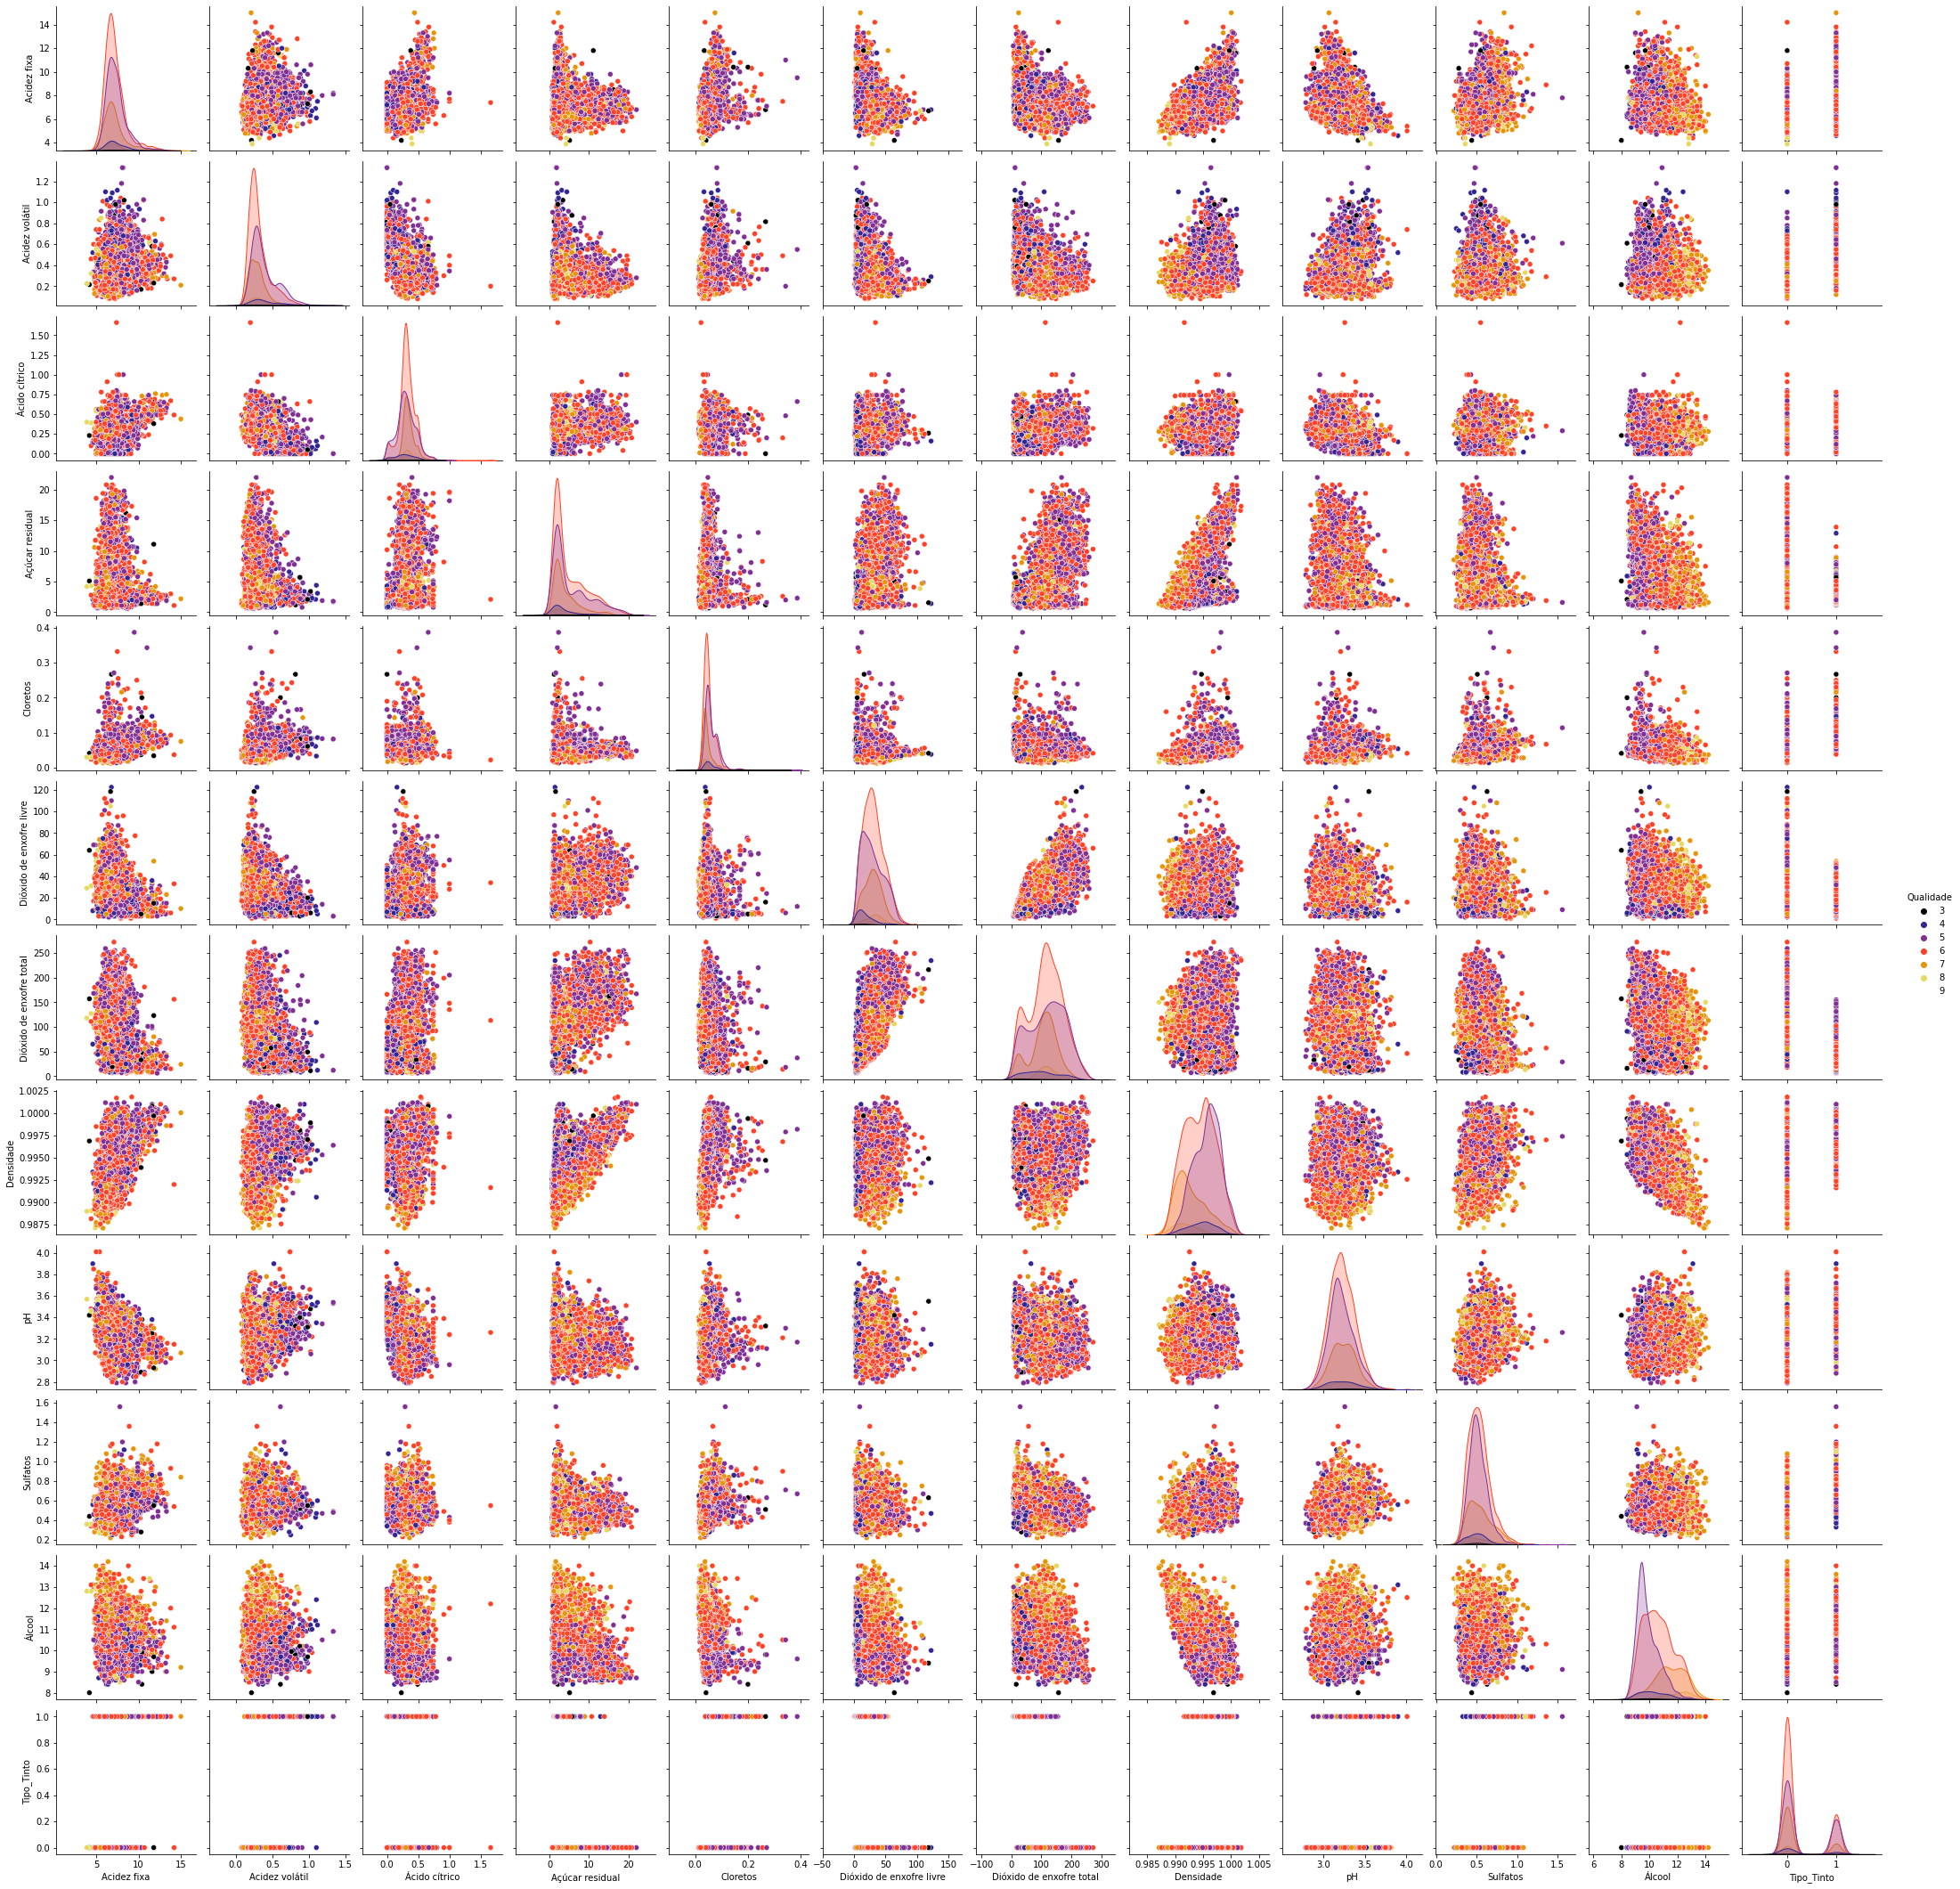

In [72]:
# Pairplot indicando as dispersões entre as variáveis (colunas)
sns.pairplot(vinhos_dummies, palette="CMRmap", hue="Qualidade")
plt.show()

### Mapa de calor:

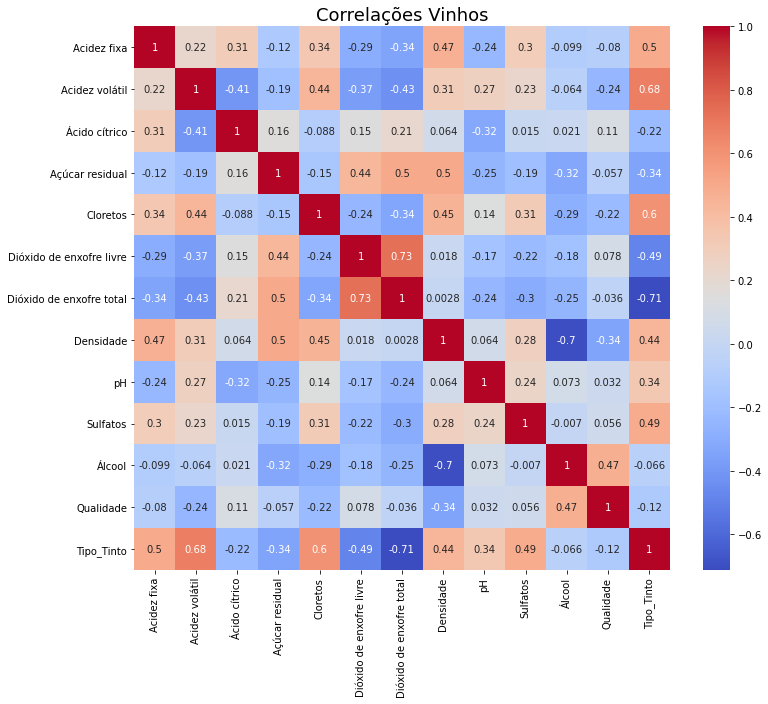

In [73]:
# Define o tamanho da figura
plt.figure(figsize=(12, 10))

# Define o Titulo
plt.title("Correlações Vinhos", size=18)

# Mapa de Calor da Correlação
sns.heatmap(vinhos_dummies.corr(), cmap="coolwarm", annot=True)
plt.show()

- Pelo do **mapa de calor** das correlações entre as variáveis, podemos verificar que as maiores correlações são entre as variáveis:
  - **álcool** e **densidade**,
  - **dióxido de enxofre total** com o tipo **tinto**,
  - **acidez fixa** com o tipo **tinto**.

Analisando essas correlações, pressupõe-se que as variáveis **acidez fixa** e **dióxido de enxofre total** sejam mais importantes para o vinho `tinto` do que para o vinho `branco`.

### Gráficos Distplot das colunas para verificação da distribuição dos dados:

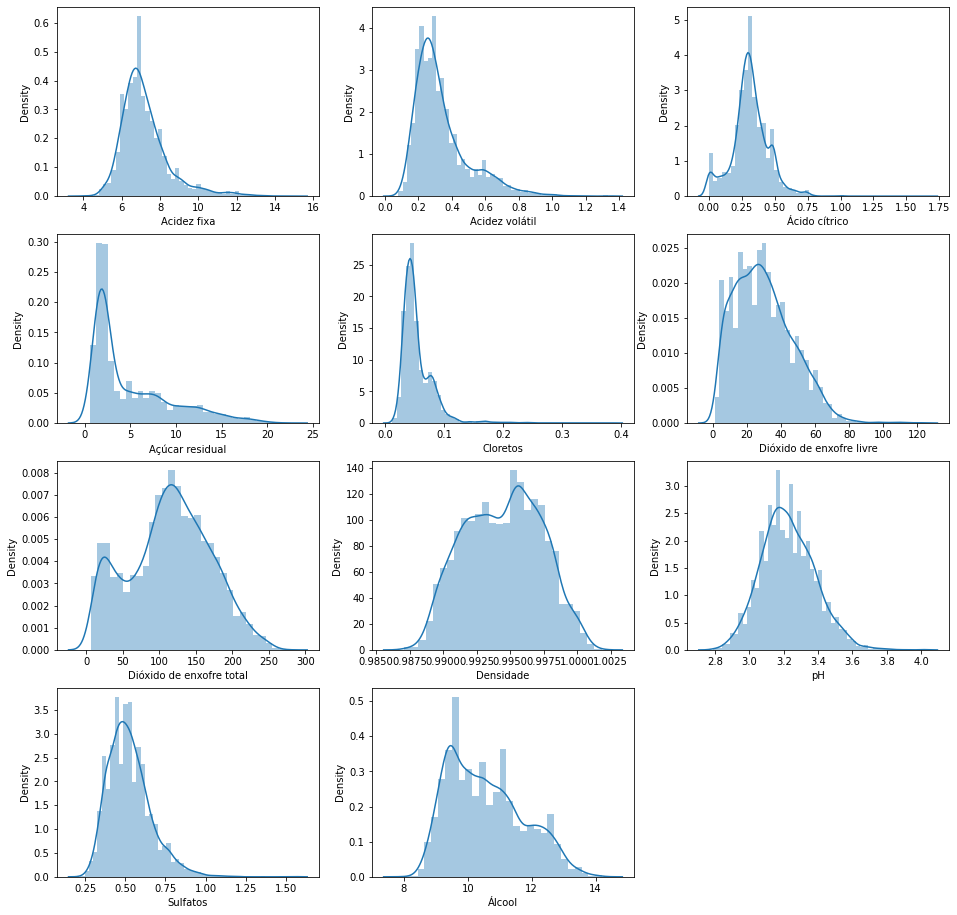

In [74]:
# Define o tamanho da figura
figure = plt.figure(figsize=(16, 16))

# Cria a variável "colunas", que são todas as colunas do dataset menos a coluna "qualidade" (coluna target)
colunas = vinhos_dummies.columns[:-2]

# Laço para criação dos boxplots
for i in range(len(colunas)):
    figure.add_subplot(4, 3, i+1)
    subplot_title = vinhos_dummies[colunas[i]].name
    sns.distplot(vinhos_dummies[colunas[i]], kde=True)

plt.show()

### Gráficos de *Boxplot* das colunas para verificação de valores atípicos (*outliers*):

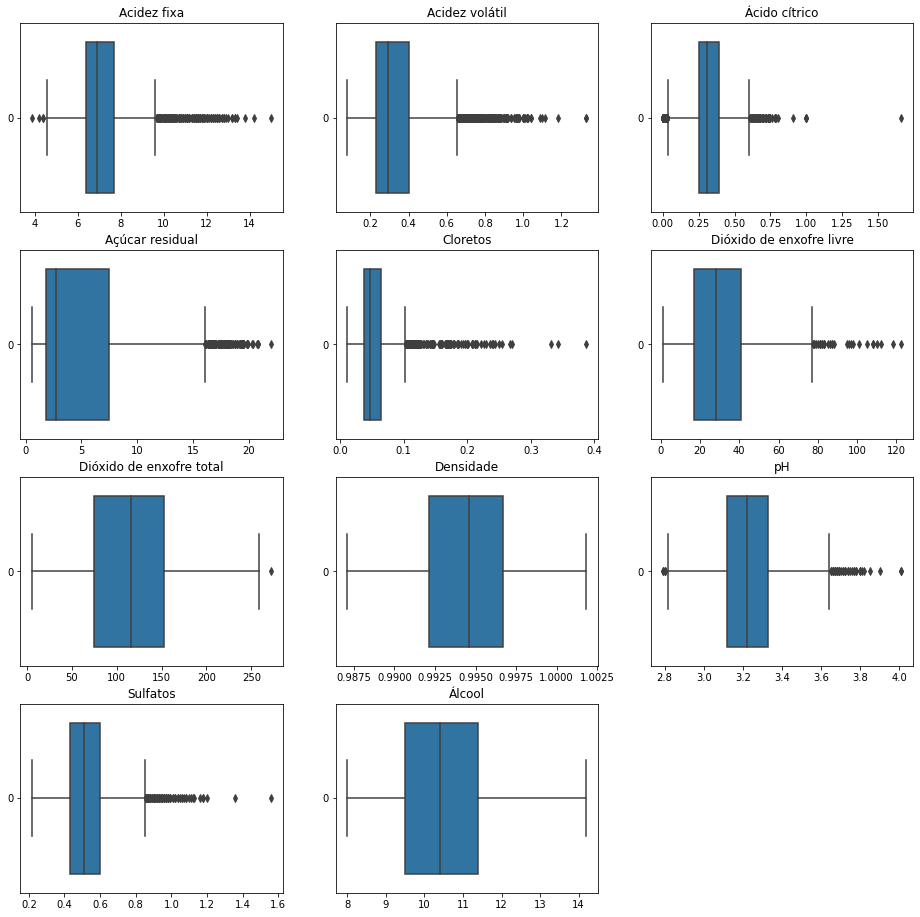

In [75]:
# Define o tamanho da figura
figure = plt.figure(figsize=(16, 16))

# Cria a variável "colunas", que são todas as colunas do dataset menos a coluna "qualidade" (coluna target)
colunas = vinhos_dummies.columns[:-2]

# Laço para criação dos boxplots
for i in range(len(colunas)):
    figure.add_subplot(4, 3, i+1)
    subplot_title = vinhos_dummies[colunas[i]].name
    sns.boxplot(data=vinhos_dummies[colunas[i]], orient="h").set_title(subplot_title)

plt.show()

In [76]:
# Verificando o % de valores outliers em cada coluna, de acordo com o IQR (Amplitude interquartil) de cada variável

outliers_lista = []
num_linhas = vinhos_dummies.shape[0]
for i in range(len(colunas)):
    # IQR
    Q1 = np.percentile(vinhos_dummies[colunas[i]], 25, interpolation = 'midpoint')
    Q3 = np.percentile(vinhos_dummies[colunas[i]], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1

    tamanho_lista_atual = len(outliers_lista)
    
    # Acima do limite superior
    acima = vinhos_dummies[colunas[i]] >= (Q3+1.5*IQR)
    array_acima = np.where(acima)
    for j in array_acima:
        for v in j:
            outliers_lista.append(v)

    # Abaixo do limite inferior
    inferior = vinhos_dummies[colunas[i]] <= (Q1-1.5*IQR)
    array_inferior = np.where(inferior)
    for j in array_inferior:
        for v in j:
            outliers_lista.append(v)
            
    perc_outliers = round(((len(outliers_lista) - tamanho_lista_atual) / num_linhas) * 100, 2)
    print(f"Percentual de outliers da coluna {vinhos_dummies[colunas[i]].name}: {perc_outliers}%")

Percentual de outliers da coluna Acidez fixa: 5.17%
Percentual de outliers da coluna Acidez volátil: 6.02%
Percentual de outliers da coluna Ácido cítrico: 6.51%
Percentual de outliers da coluna Açúcar residual: 2.59%
Percentual de outliers da coluna Cloretos: 3.79%
Percentual de outliers da coluna Dióxido de enxofre livre: 0.67%
Percentual de outliers da coluna Dióxido de enxofre total: 0.02%
Percentual de outliers da coluna Densidade: 0.0%
Percentual de outliers da coluna pH: 0.91%
Percentual de outliers da coluna Sulfatos: 2.23%
Percentual de outliers da coluna Álcool: 0.0%


- ###  A união dos datasets foi feita com as bases que já haviam passado pelo processo de remoção de outliers; dessa forma, optamos por não realizar novamente o processo de remoção para o dataset concatenado.

In [77]:
# Quantidade normalizada para cada tipo de vinho
vinhos_dummies["Tipo_Tinto"].value_counts(normalize=True)

0    0.752122
1    0.247878
Name: Tipo_Tinto, dtype: float64

Conforme delimitado ao longo do dataset, o **0 equivale aos vinhos brancos** enquanto que **1 equivale aos vinhos tintos**. Ou seja, com base na análise da célula anterior podemos observar que 75% do total de vinhos é do tipo `branco` e apenas 25% corresponde aos vinhos de tipo `tinto`.

In [78]:
# Quantidade normalizada de vinhos para cada classificação de qualidade
vinhos_dummies["Qualidade"].value_counts(normalize=True)

6    0.442668
5    0.323663
7    0.164594
4    0.035524
8    0.028222
3    0.004342
9    0.000987
Name: Qualidade, dtype: float64

<AxesSubplot:xlabel='Qualidade', ylabel='count'>

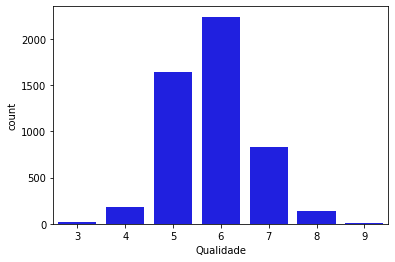

In [79]:
# Visualização da frequência de ocorrência das classificações de qualidade dos vinhos tintos
sns.countplot(vinhos_dummies["Qualidade"], color="blue")

 - Como podemos verificar acima, o número de ocorrências das classificações 5 e 6 correspondem a mais de 75% de todo o dataset.

---------------
--------------------

## Criando o modelo de *__Regressão Linear__*

In [80]:
# Separa no X e y
X = vinhos_dummies.drop(["Qualidade"], axis=1)
y = vinhos_dummies["Qualidade"]

# separa a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
# Instancia a classe do StandardScaler
scaler = StandardScaler()

# Transformação dos dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [82]:
# Instancia o modelo
model = LinearRegression()

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
model.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred = model.predict(X_test_std)

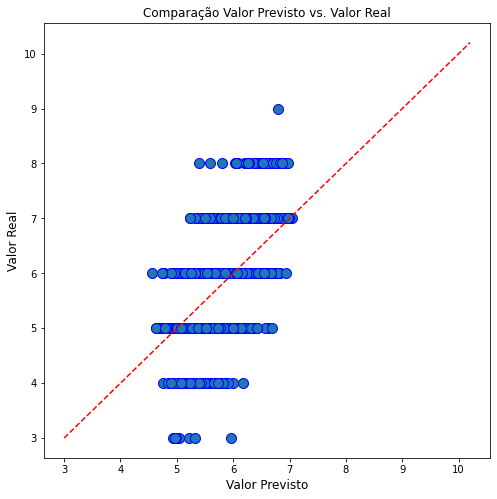

In [83]:
# Vamos criar um gráfico para comparar os Valores Reais com os Previstos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title("Comparação Valor Previsto vs. Valor Real", fontsize=12)
plt.ylabel("Valor Real", fontsize=12)
plt.xlabel("Valor Previsto", fontsize=12)

# Mostra os valores previstos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [84]:
# Calcula o R2 score
R2 = r2_score(y_test, y_pred)

# Print do valor do R2
print("R2: ", R2)

R2:  0.3365889415540424


In [85]:
# Feature Importance - Regressão Linear
coefs = model.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)
    
dictionary = {"Features": list_feature,
              "Scores": list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=["Scores"], ascending=False)
df_features.reset_index(inplace=True, drop=True)
df_features

Features    Scores
0            Açúcar residual  0.308438
1                     Álcool  0.218315
2                 Tipo_Tinto  0.181962
3                Acidez fixa  0.143276
4   Dióxido de enxofre livre  0.128518
5                         pH  0.122411
6                   Sulfatos  0.119170
7              Ácido cítrico  0.020365
8                   Cloretos -0.002921
9   Dióxido de enxofre total -0.064770
10            Acidez volátil -0.198418
11                 Densidade -0.422586

### Conclusão a respeito do modelo de Regressão Linear:

 - Como podemos verificar através do R2 obtido para este modelo (0,33), e também através do gráfico que compara os valores previstos com os valores reais, chegamos a conclusão que um modelo de Regressão Linear para prever qual a classificação de qualidade de um determinado tipo de vinho, conforme suas características, __não é um bom modelo__.
 - Isso se explica, pois a nossa variável target (Qualidade) tem como saída apenas valores discretos e se assemelham mais com classes de qualidade, ou seja, um modelo de classificação poderá explicar melhor estes dados.

--------------------------------
---------------------------------

## Criando o modelo de *__Regressão Logística__*

In [86]:
# Criando um novo dataframe para realizar a mudança da coluna target
vinhos_dummies_log = vinhos_dummies.copy()


# Modificando a coluna "Qualidade" seguindo os critérios de qualidade descritos acima
vinhos_dummies_log["Qualidade"] = np.where(vinhos_dummies_log["Qualidade"]>=6, 1, 0)

# Visualizando o dataset após a mudança
vinhos_dummies_log.head()

Acidez fixa  Acidez volátil  Ácido cítrico  Açúcar residual  Cloretos  \
0          7.4            0.70           0.00              1.9     0.076   
1          7.8            0.88           0.00              2.6     0.098   
2          7.8            0.76           0.04              2.3     0.092   
3         11.2            0.28           0.56              1.9     0.075   
4          7.4            0.66           0.00              1.8     0.075   

   Dióxido de enxofre livre  Dióxido de enxofre total  Densidade    pH  \
0                      11.0                      34.0     0.9978  3.51   
1                      25.0                      67.0     0.9968  3.20   
2                      15.0                      54.0     0.9970  3.26   
3                      17.0                      60.0     0.9980  3.16   
4                      13.0                      40.0     0.9978  3.51   

   Sulfatos  Álcool  Qualidade  Tipo_Tinto  
0      0.56     9.4          0           1  
1      0.68     9.8          0           1  
2      0.65     9.8          0           1  
3      0.58     9.8          1           1  
4      0.56     9.4          0           1

In [87]:
# Verificando a frequência das classes 0 e 1 na coluna target

vinhos_dummies_log["Qualidade"].value_counts(normalize=True)

1    0.636471
0    0.363529
Name: Qualidade, dtype: float64

 - Neste caso, como a frequência apresenta uma diferença significativa, vamos utilizar o parâmetro `stratify` na hora de separar em treino e teste. Este parâmetro mantém a diferença de frequência do dataset para os dados de treino e de teste.

In [88]:
# Seprando em X e y
X = vinhos_dummies_log.drop(["Qualidade"], axis=1)
y = vinhos_dummies_log["Qualidade"]

# Separa a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [89]:
# Instancia a classe do StandardScaler
scaler = StandardScaler()

# Transformação dos dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [90]:
# Instancia o modelo
model = LogisticRegression()

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
model.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred = model.predict(X_test_std)

In [91]:
# Print do classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.55      0.61       553
           1       0.77      0.85      0.81       968

    accuracy                           0.74      1521
   macro avg       0.72      0.70      0.71      1521
weighted avg       0.74      0.74      0.74      1521



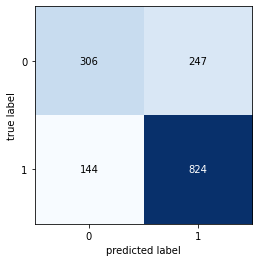

In [92]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da Matrix
plot_confusion_matrix(conf_mat=cm)
plt.show()

## Conclusão a respeito do modelo de Regressão Logística:

 - Ao analisar o resultado obtido, podemos concluir que esse **é um bom modelo** e consegue representar nossos dados com uma acurácia de 74% com uma diferença relativamente baixa entre a preciãos e recall das classes 0 e 1.
 
- Ou seja, podemos concluir que um modelo de Classificação, como a Regressão Logística, é o mais indicado para analisarmos o dataset a respeito da qualidade de vinhos brancos.


- É importante ressaltar que a quantidade de vinhos bons (**classe 1**), equivale, em termos práticos, ao dobro de vinhos ruins (**classe 0**). Por esse motivo, tanto *precision* quanto *recall* apresentam uma diferença significativa em seus valores para ambas as classes.

--------------------------------
---------------------------------
---------------------------------

# Conclusão do projeto

Após tratarmos todas as bases e realizarmos a análise de correlação de variáveis que determinam a qualidade, além de prepararmos os modelos de regressão linear e regressão logística, pudemos observar que:

- Como temos variáveis discretas na coluna target (Qualidade), o modelo de regressão linear não é eficiente para prever a qualidade que um determinado vinho terá, seja qual for o seu tipo.


- Já o modelo de regressão logística traz resultados melhores, pois classifica os vinhos em bons ou ruins, conforme o seu valor de qualidade. Entretanto, os datasets analisados possuem mais vinhos classificados como bons do que como ruins e isso também pode desbalancear o modelo.


- Apesar dos resultados para o modelo de regressão logística dos datasets concatenados terem sido positivos, é possível que o modelo não fique tão assertivo, pois os vinhos tintos e brancos possuem características diferentes para cada variável que determina a qualidade e seu respectivo valor. 